# Tool for benchmark plotting

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import ast
import seaborn as sns

### Importing files and first clean

In [151]:

benchmarks = {}
for ele in os.listdir('./results/'):
    if ele.endswith('.txt'):
        benchmarks[ele.split('.')[0]] = []

# in: benchmarks
# out: {'Windows_4_luglio': [], 'Linux_4_luglio_2': [], 'Linux_4_luglio': []}

def clean_dict(tex):
    tex = tex[0:-1] # dropping '\n'
    # print(tex)
    ex_d = ast.literal_eval(tex)

    for ele in ['relative_error', 'memory_peak']:
        ex_d[ele] = float('.'.join(ex_d[ele].split(',')))

    for ele in ['read_times', 'solve_times']:
        final = []
        for num in ex_d[ele].split(';'):
            final.append(float('.'.join(num.split(','))))
        ex_d[ele] = final
    
    return ex_d



for ele in benchmarks:
    with open('./results/' + ele + '.txt') as f:
        lines = f.readlines()
        for line in lines:
            benchmarks[ele].append(clean_dict(line))

benchmarks.keys()

dict_keys(['Windows_4_luglio', 'Linux_4_luglio_2', 'Linux_4_luglio', 'MatlabWindows_', 'MatlabLinux_'])

In [156]:
benchmarks['MatlabWindows_'][0:2]

[{'matrix': 'ex15.mtx',
  'relative_error': 3.7728e-07,
  'memory_peak': 12.246864,
  'read_times': [0.013255, 0.012363, 0.014436, 0.01546, 0.01239],
  'solve_times': [0.020354, 0.023621, 0.026351, 0.035562, 0.029339]},
 {'matrix': 'shallow_water1.mtx',
  'relative_error': 1.6939e-16,
  'memory_peak': 12.4957623,
  'read_times': [0.012684, 0.011621, 0.013654, 0.012653, 0.016598],
  'solve_times': [0.099951, 0.099967, 0.099986, 0.099939, 0.129269]}]

### Test plot 1

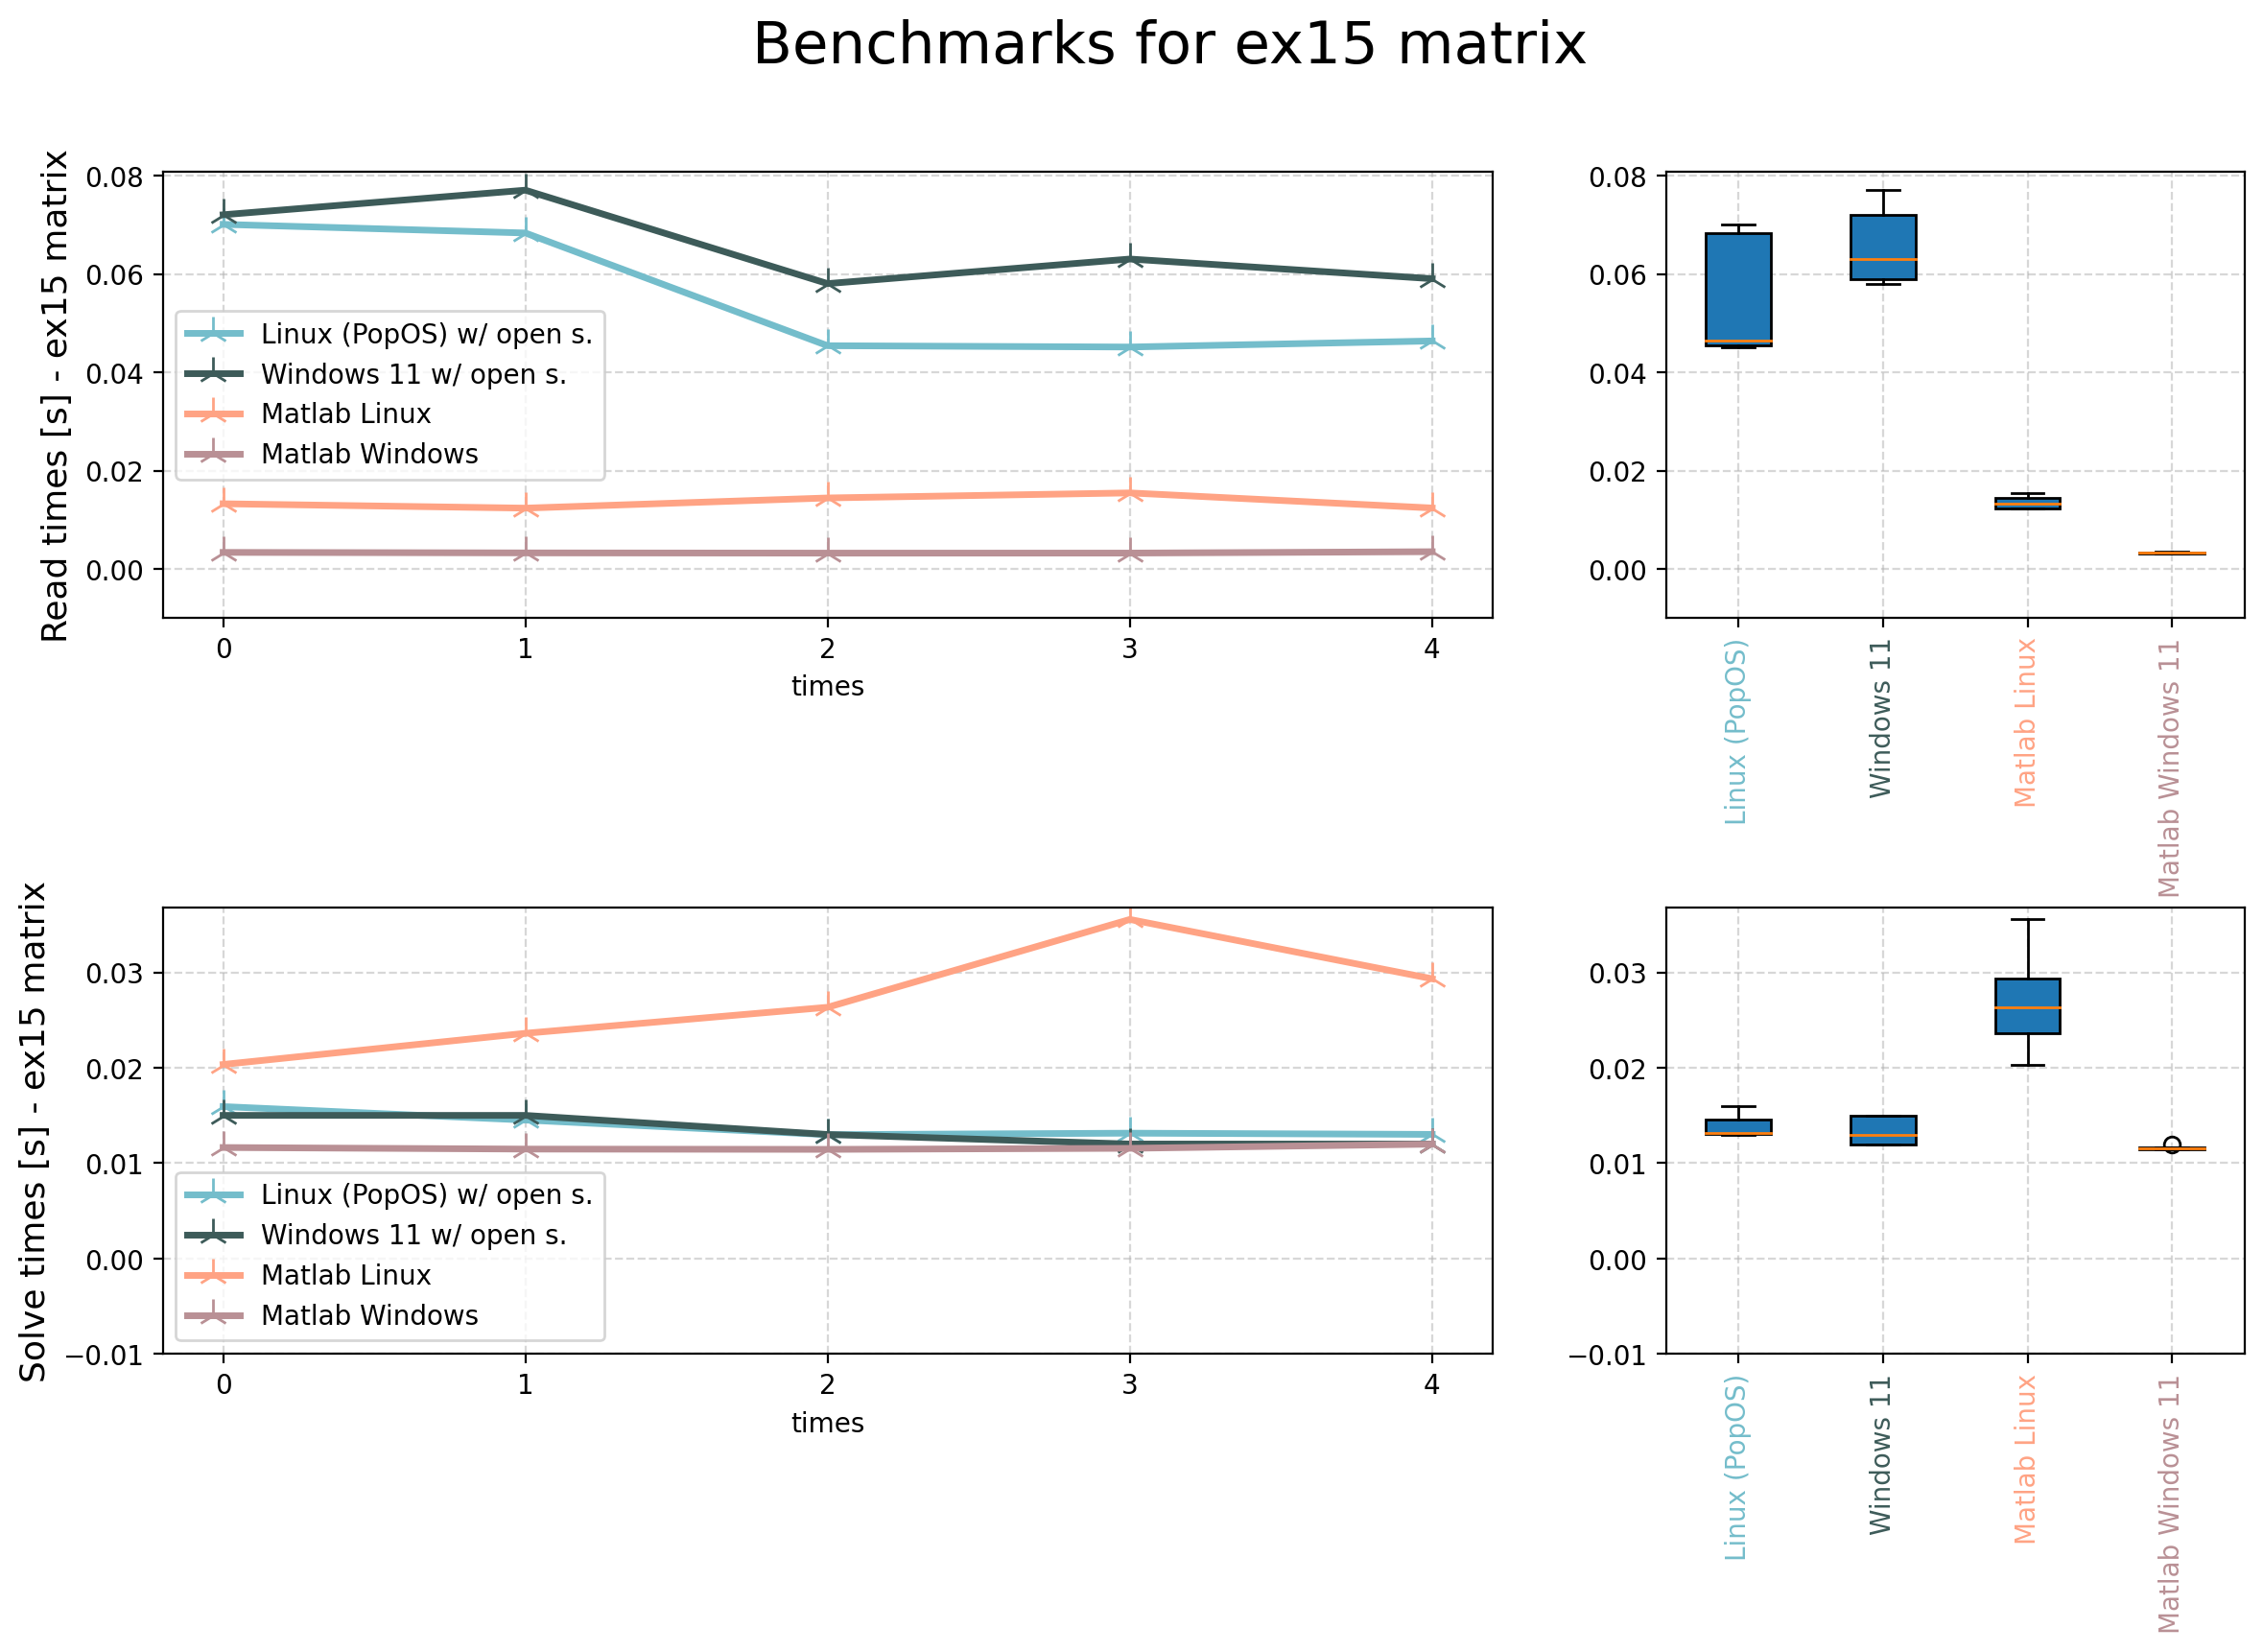

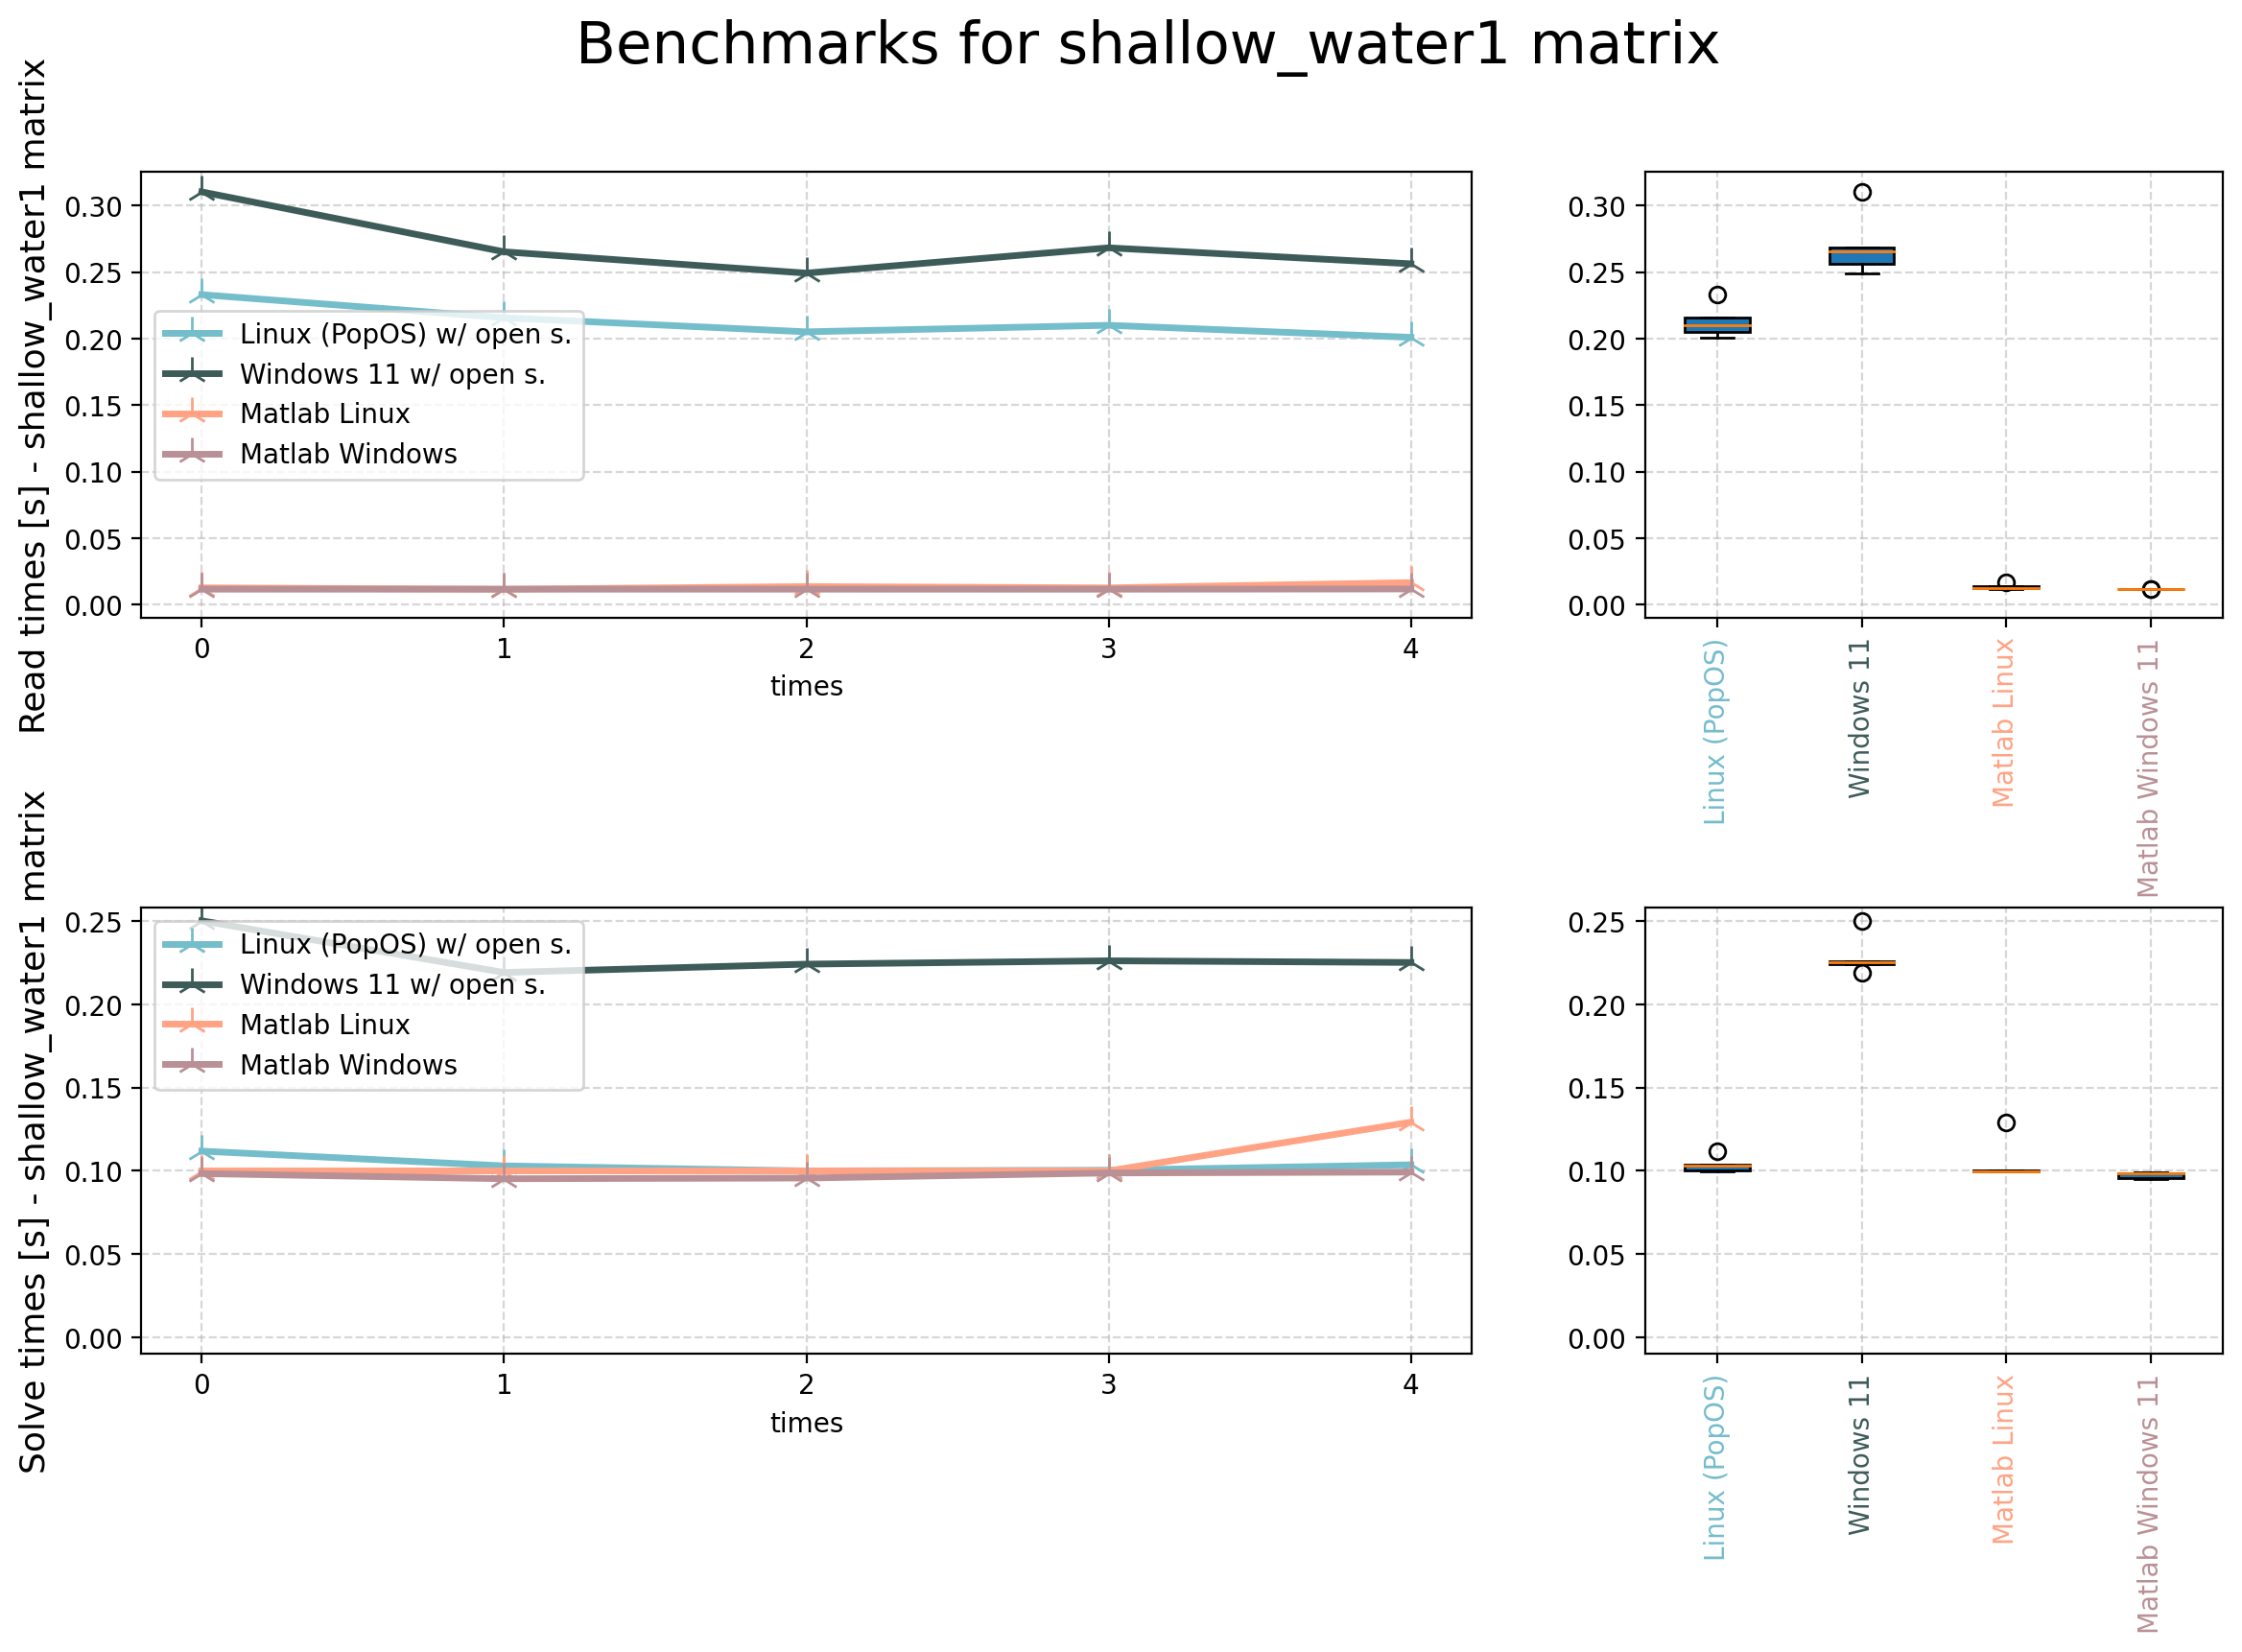

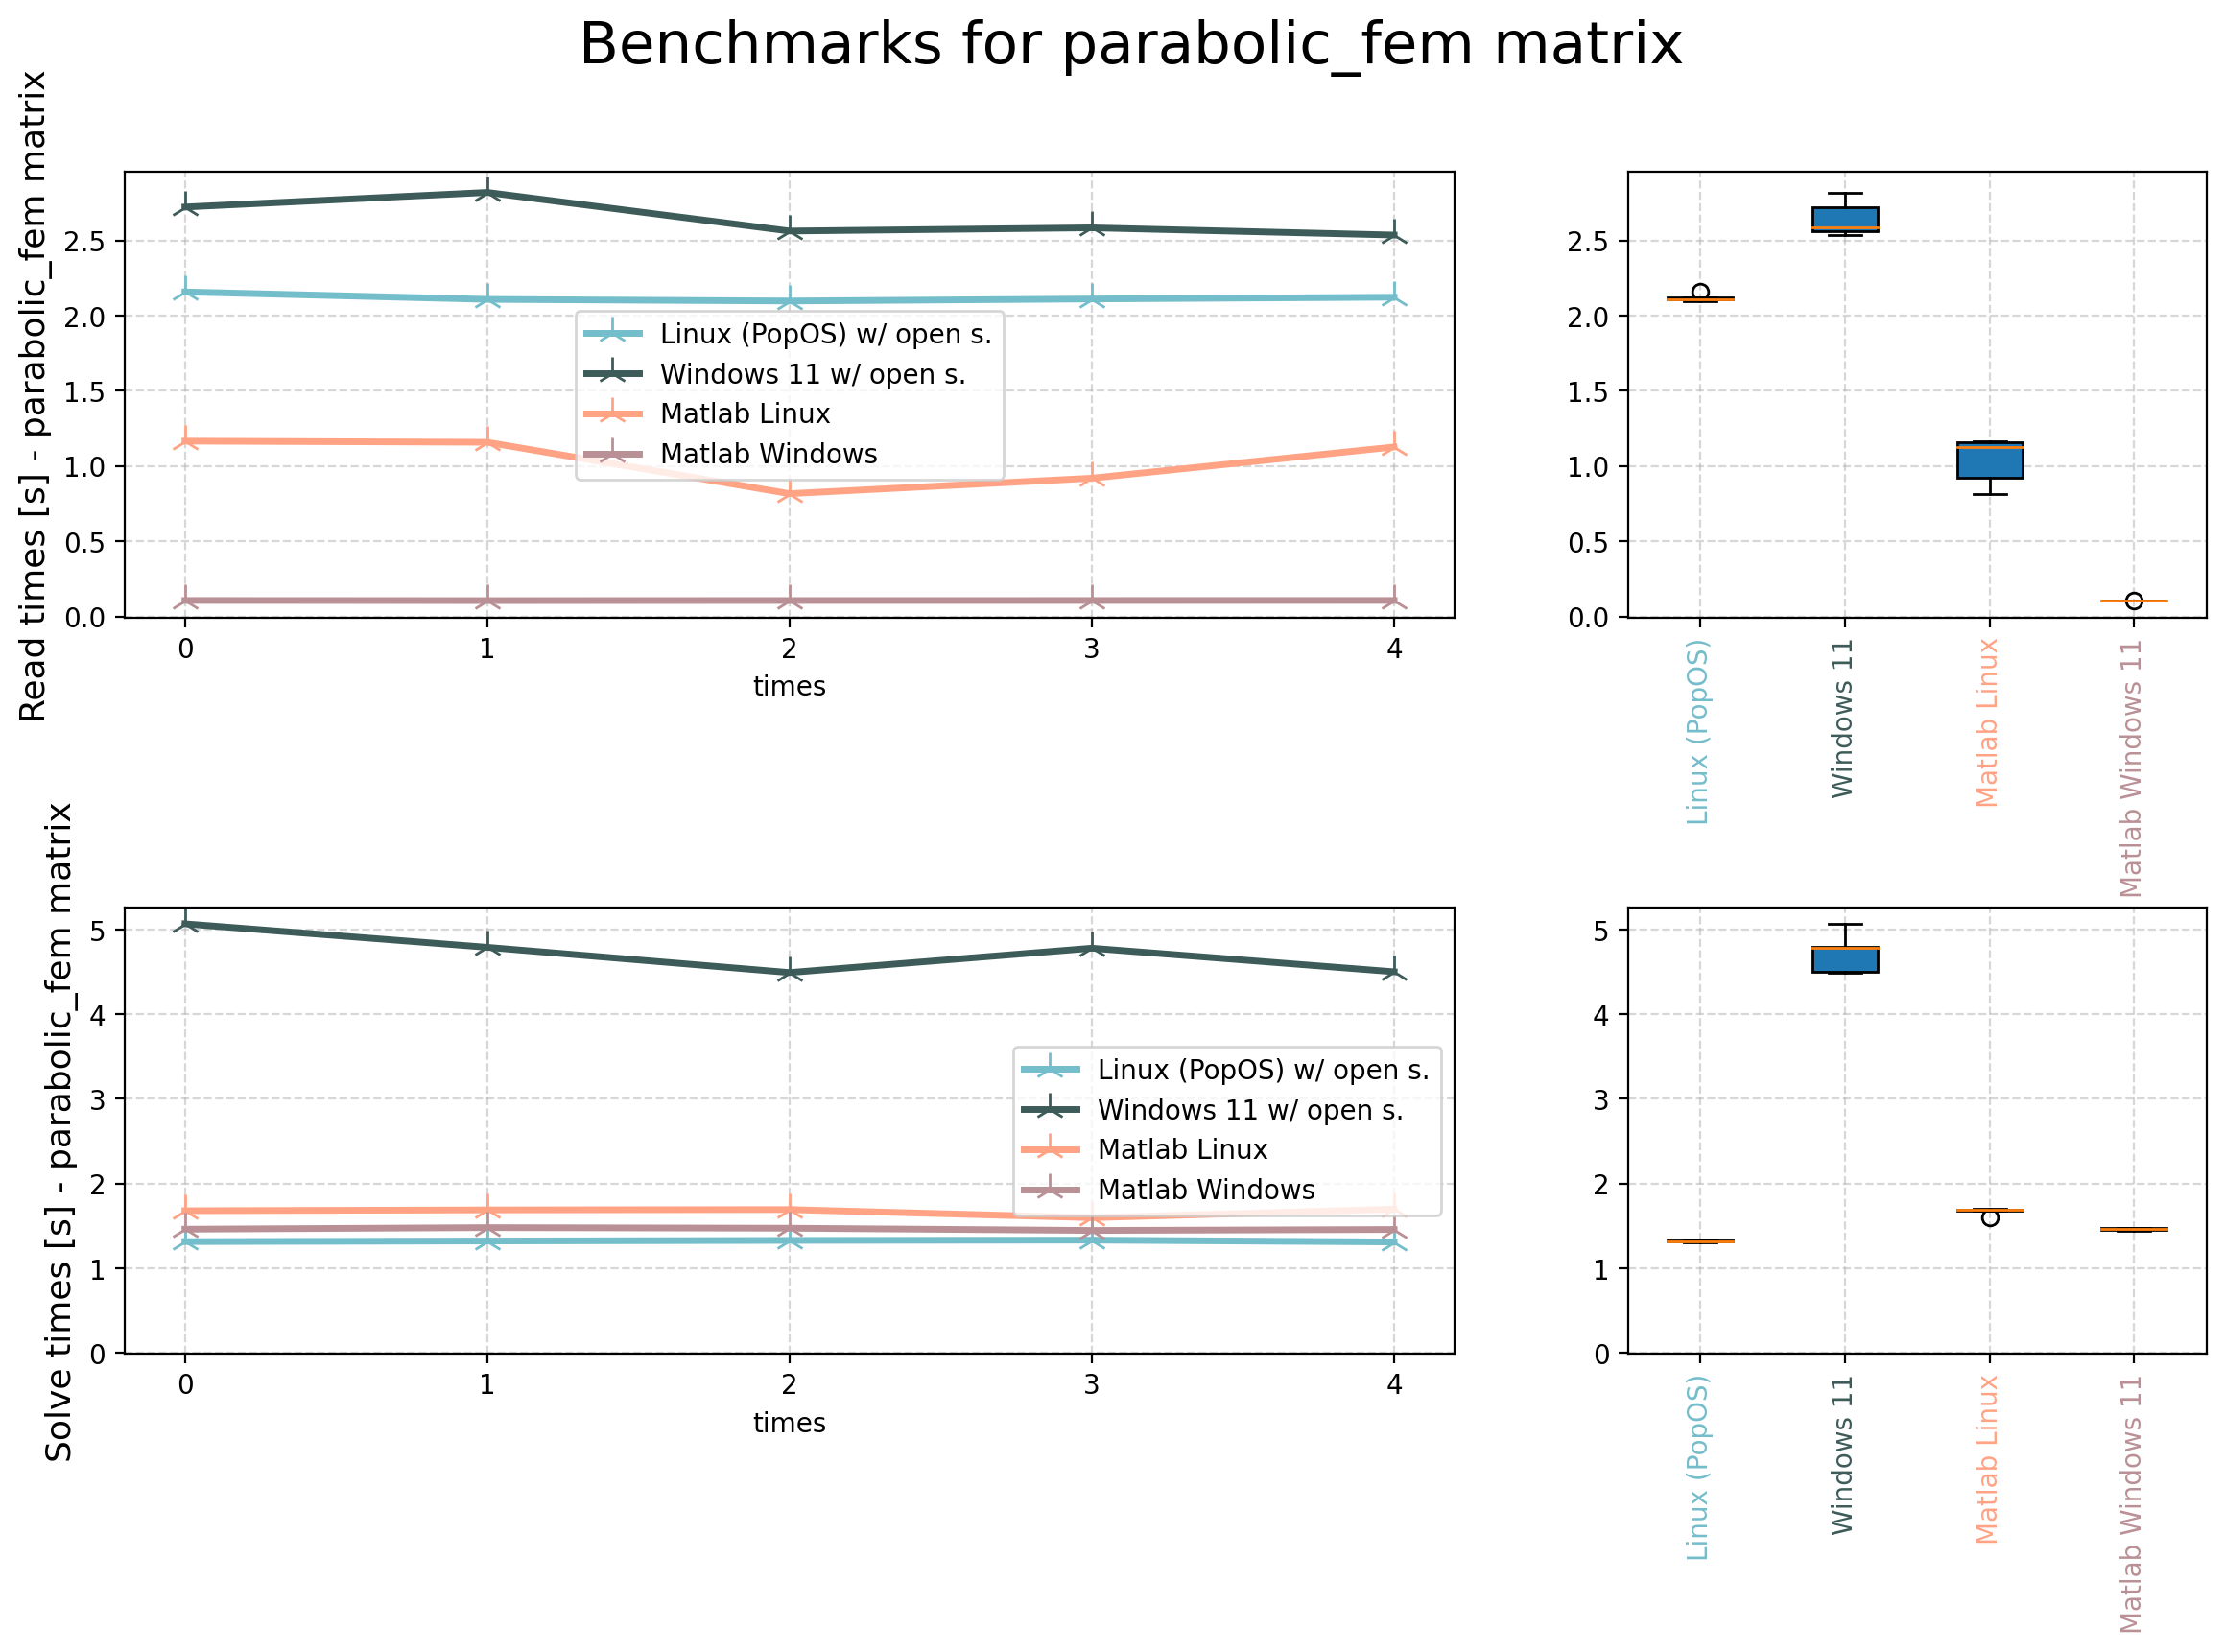

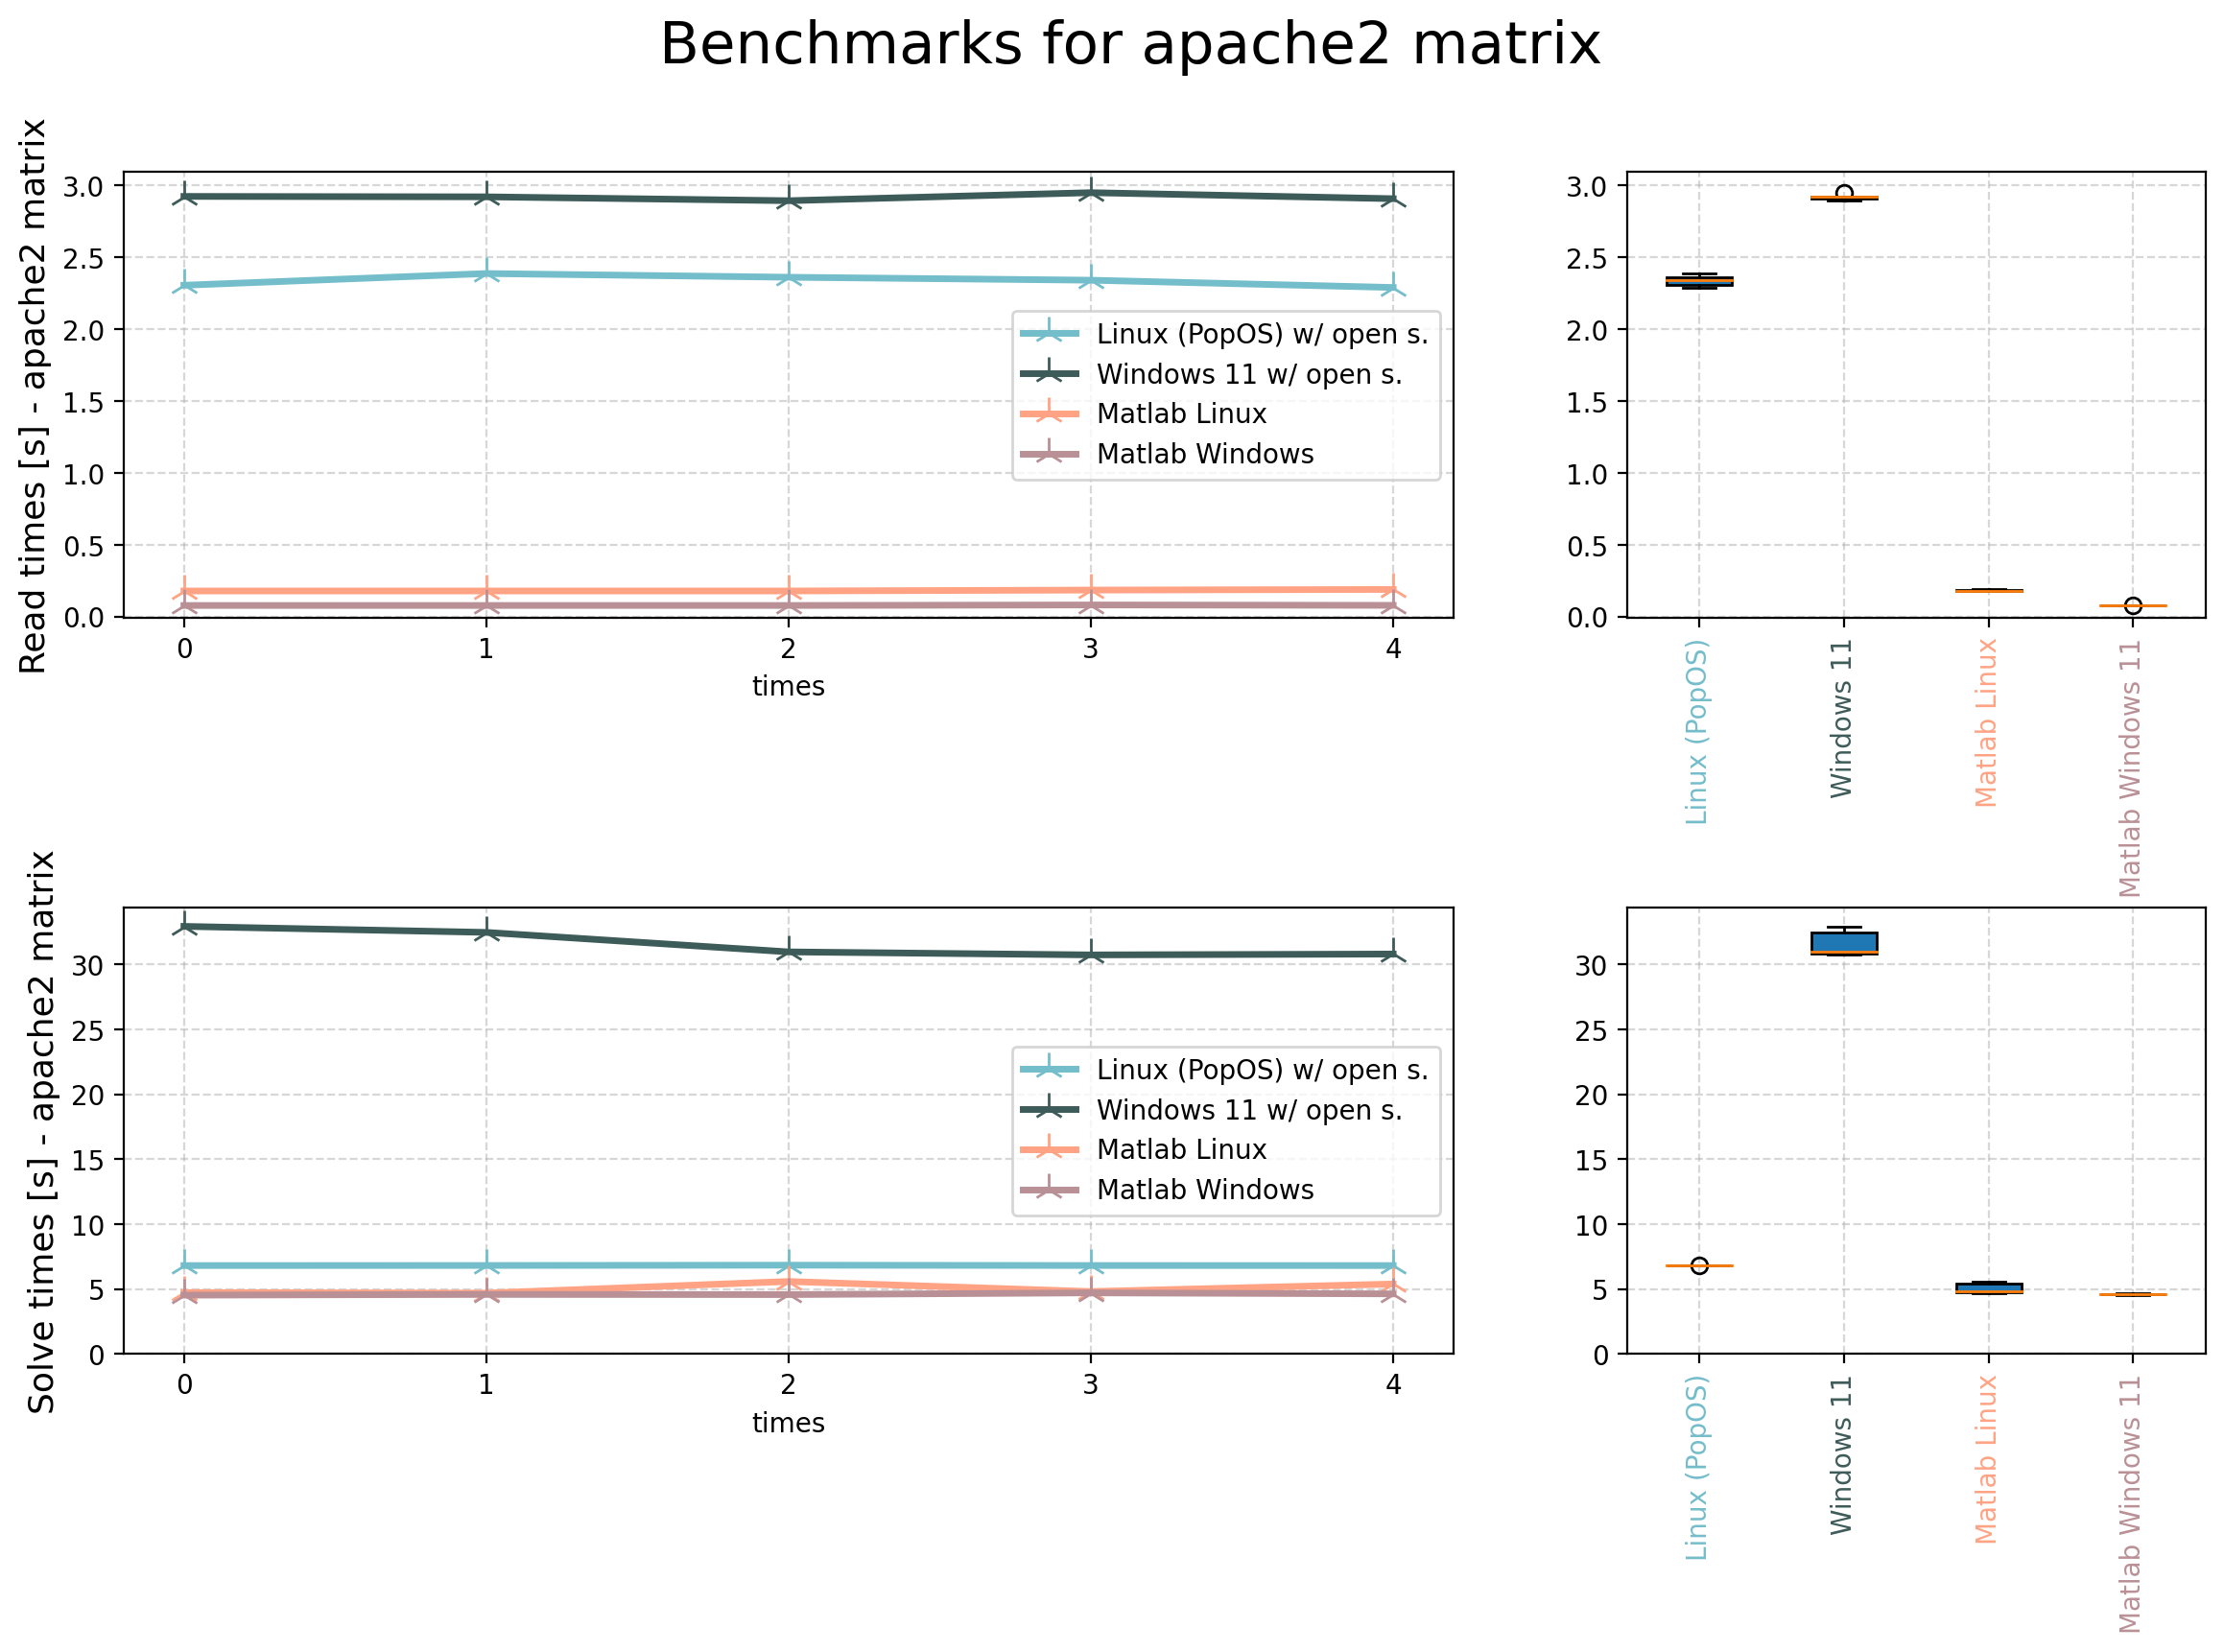

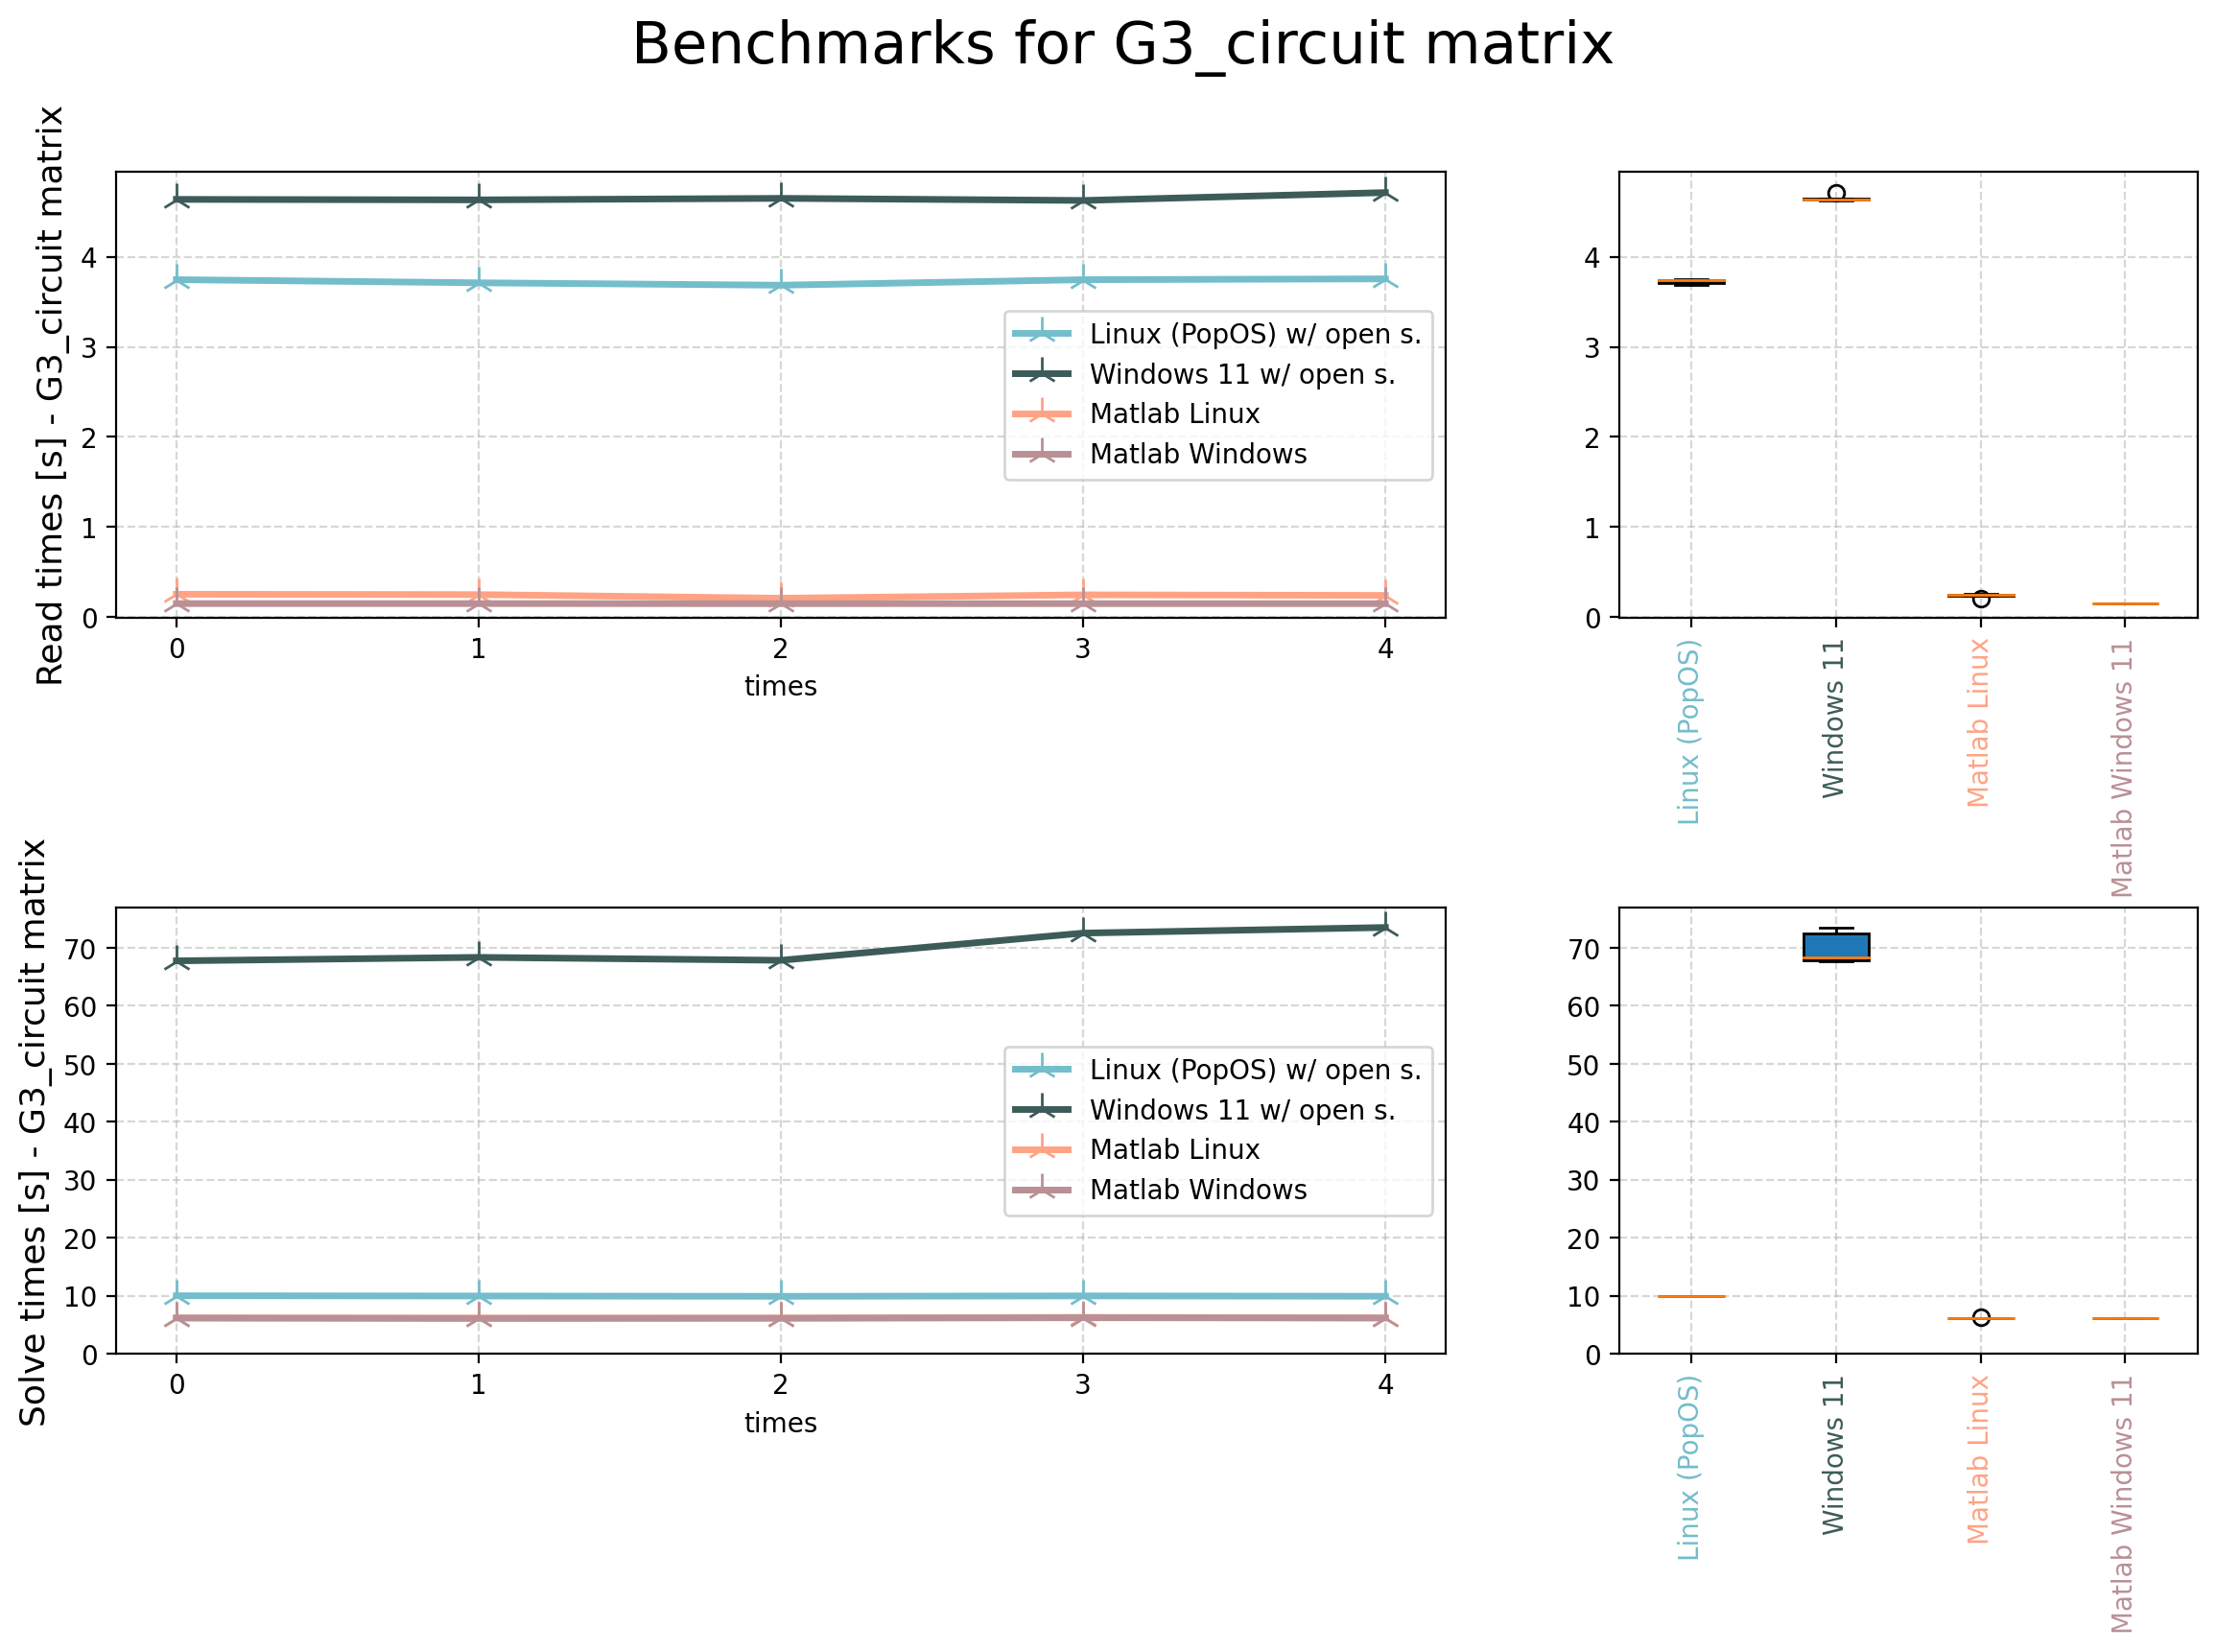

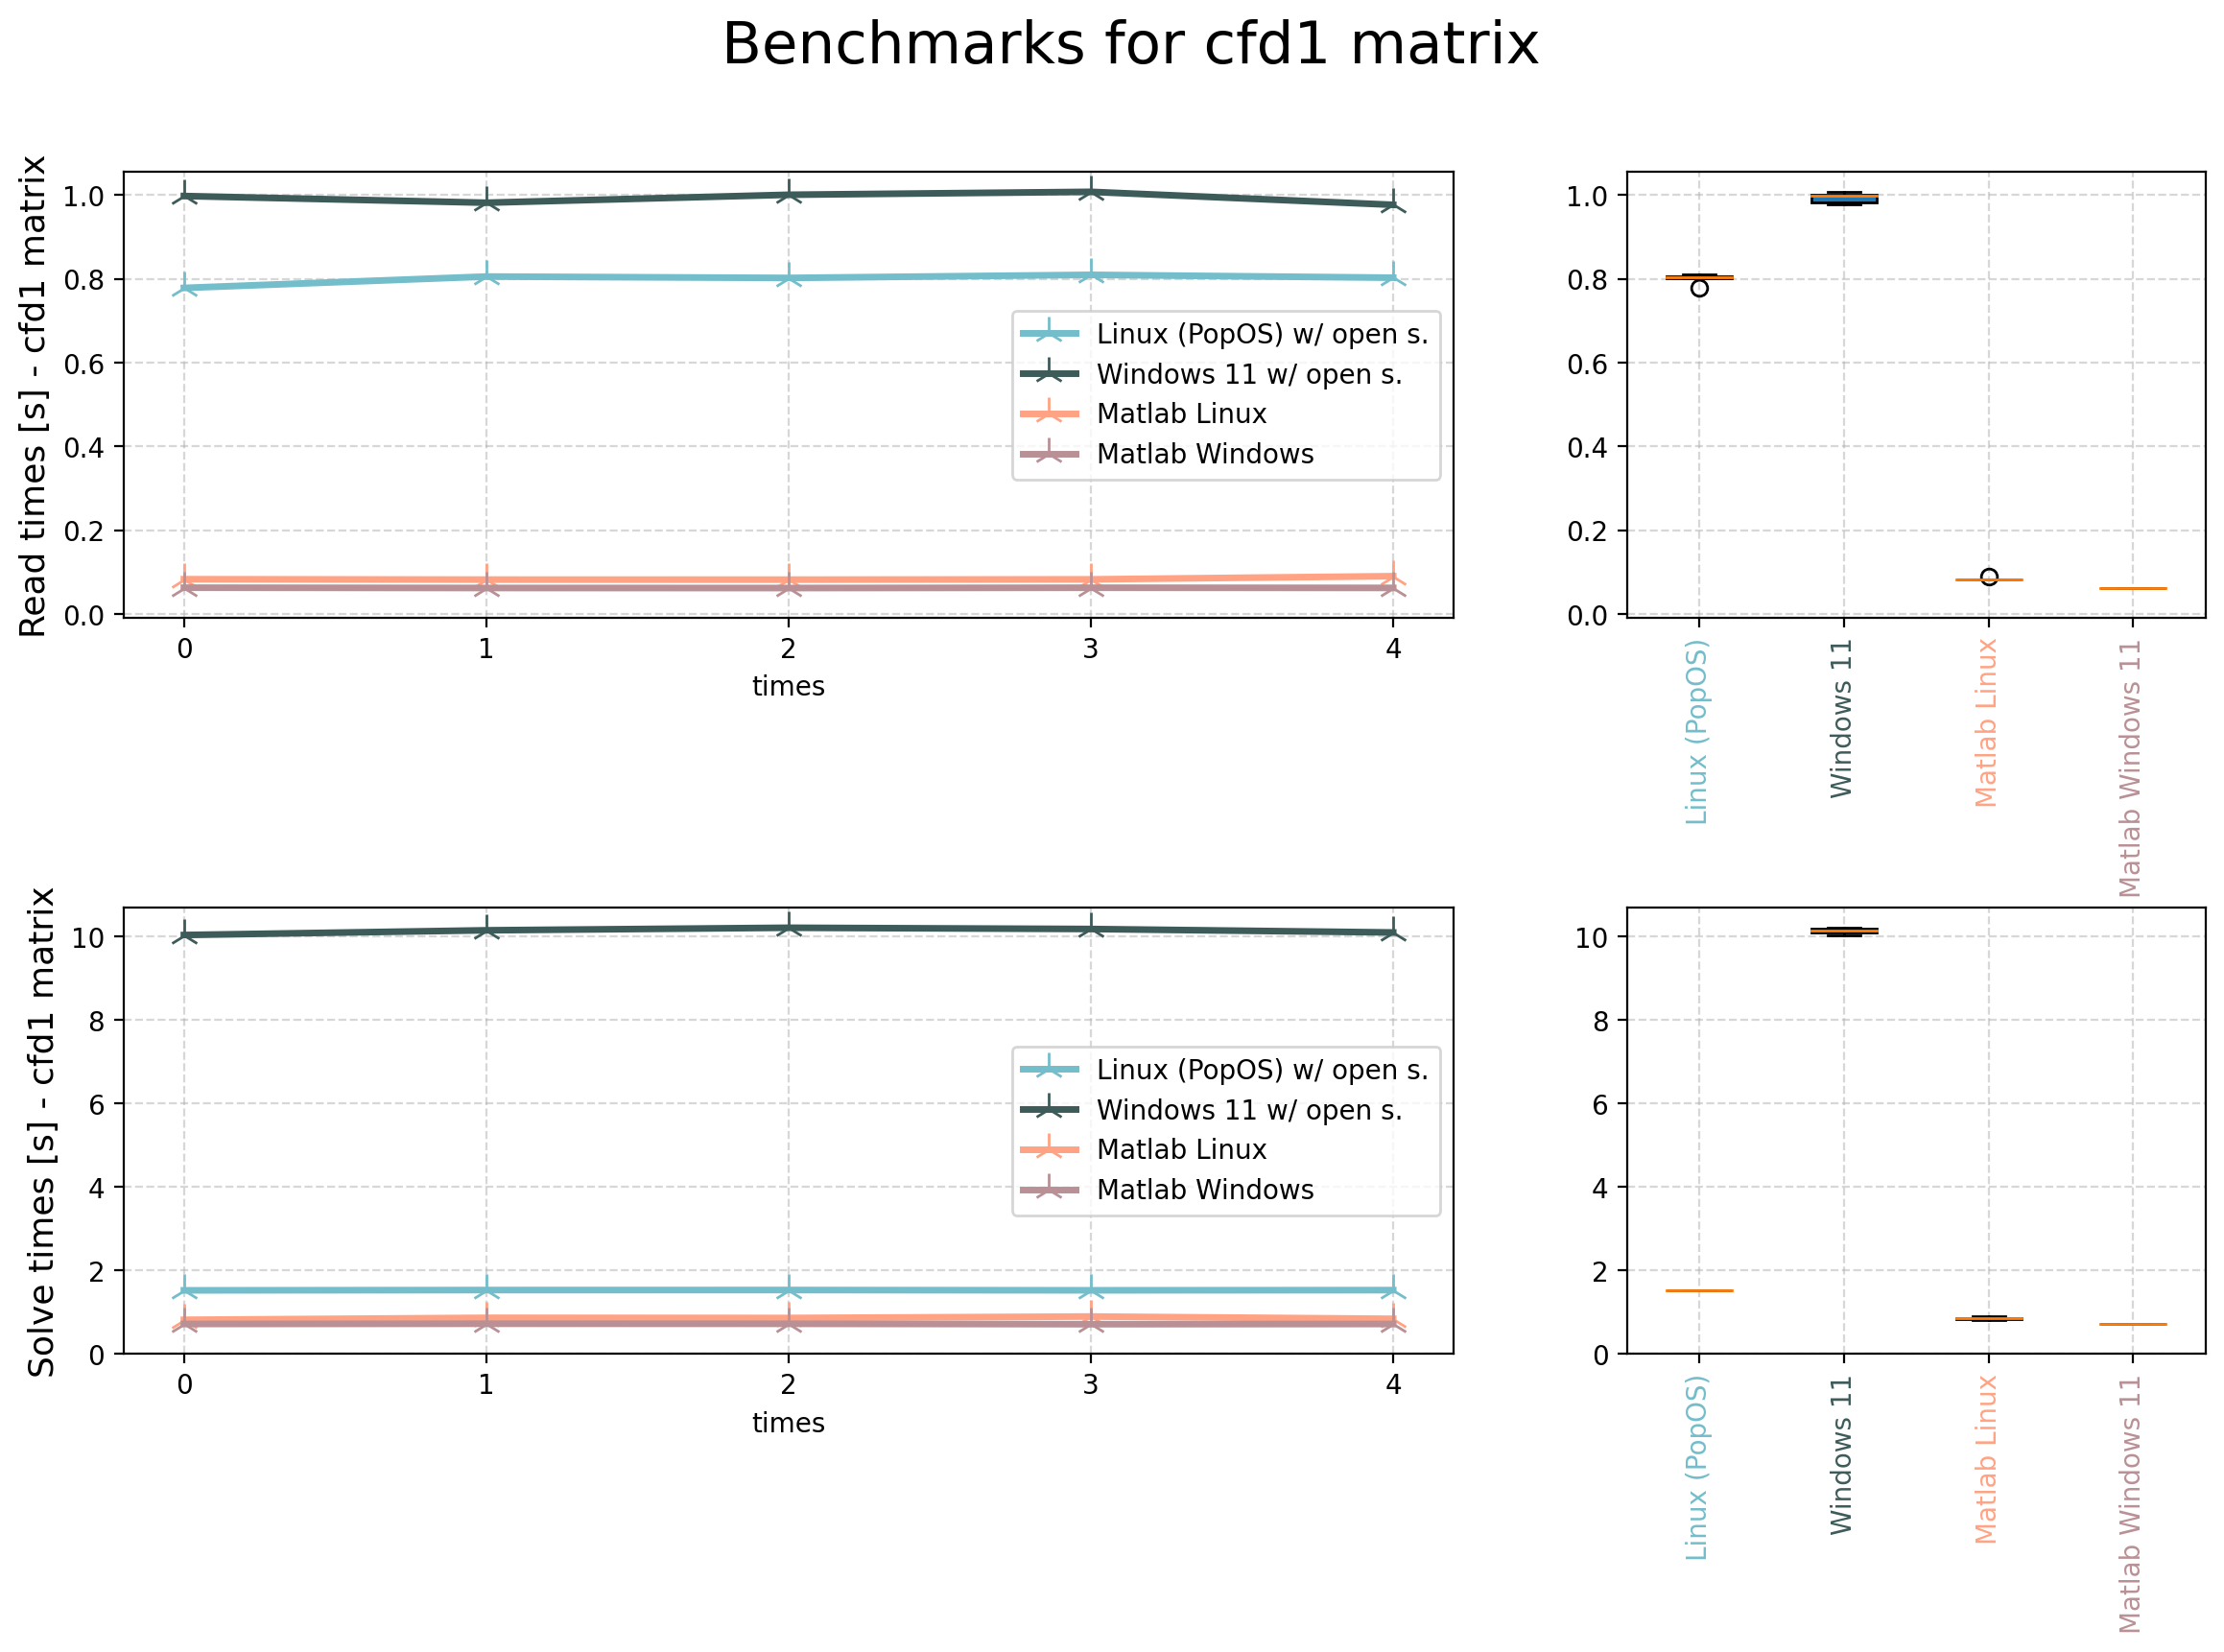

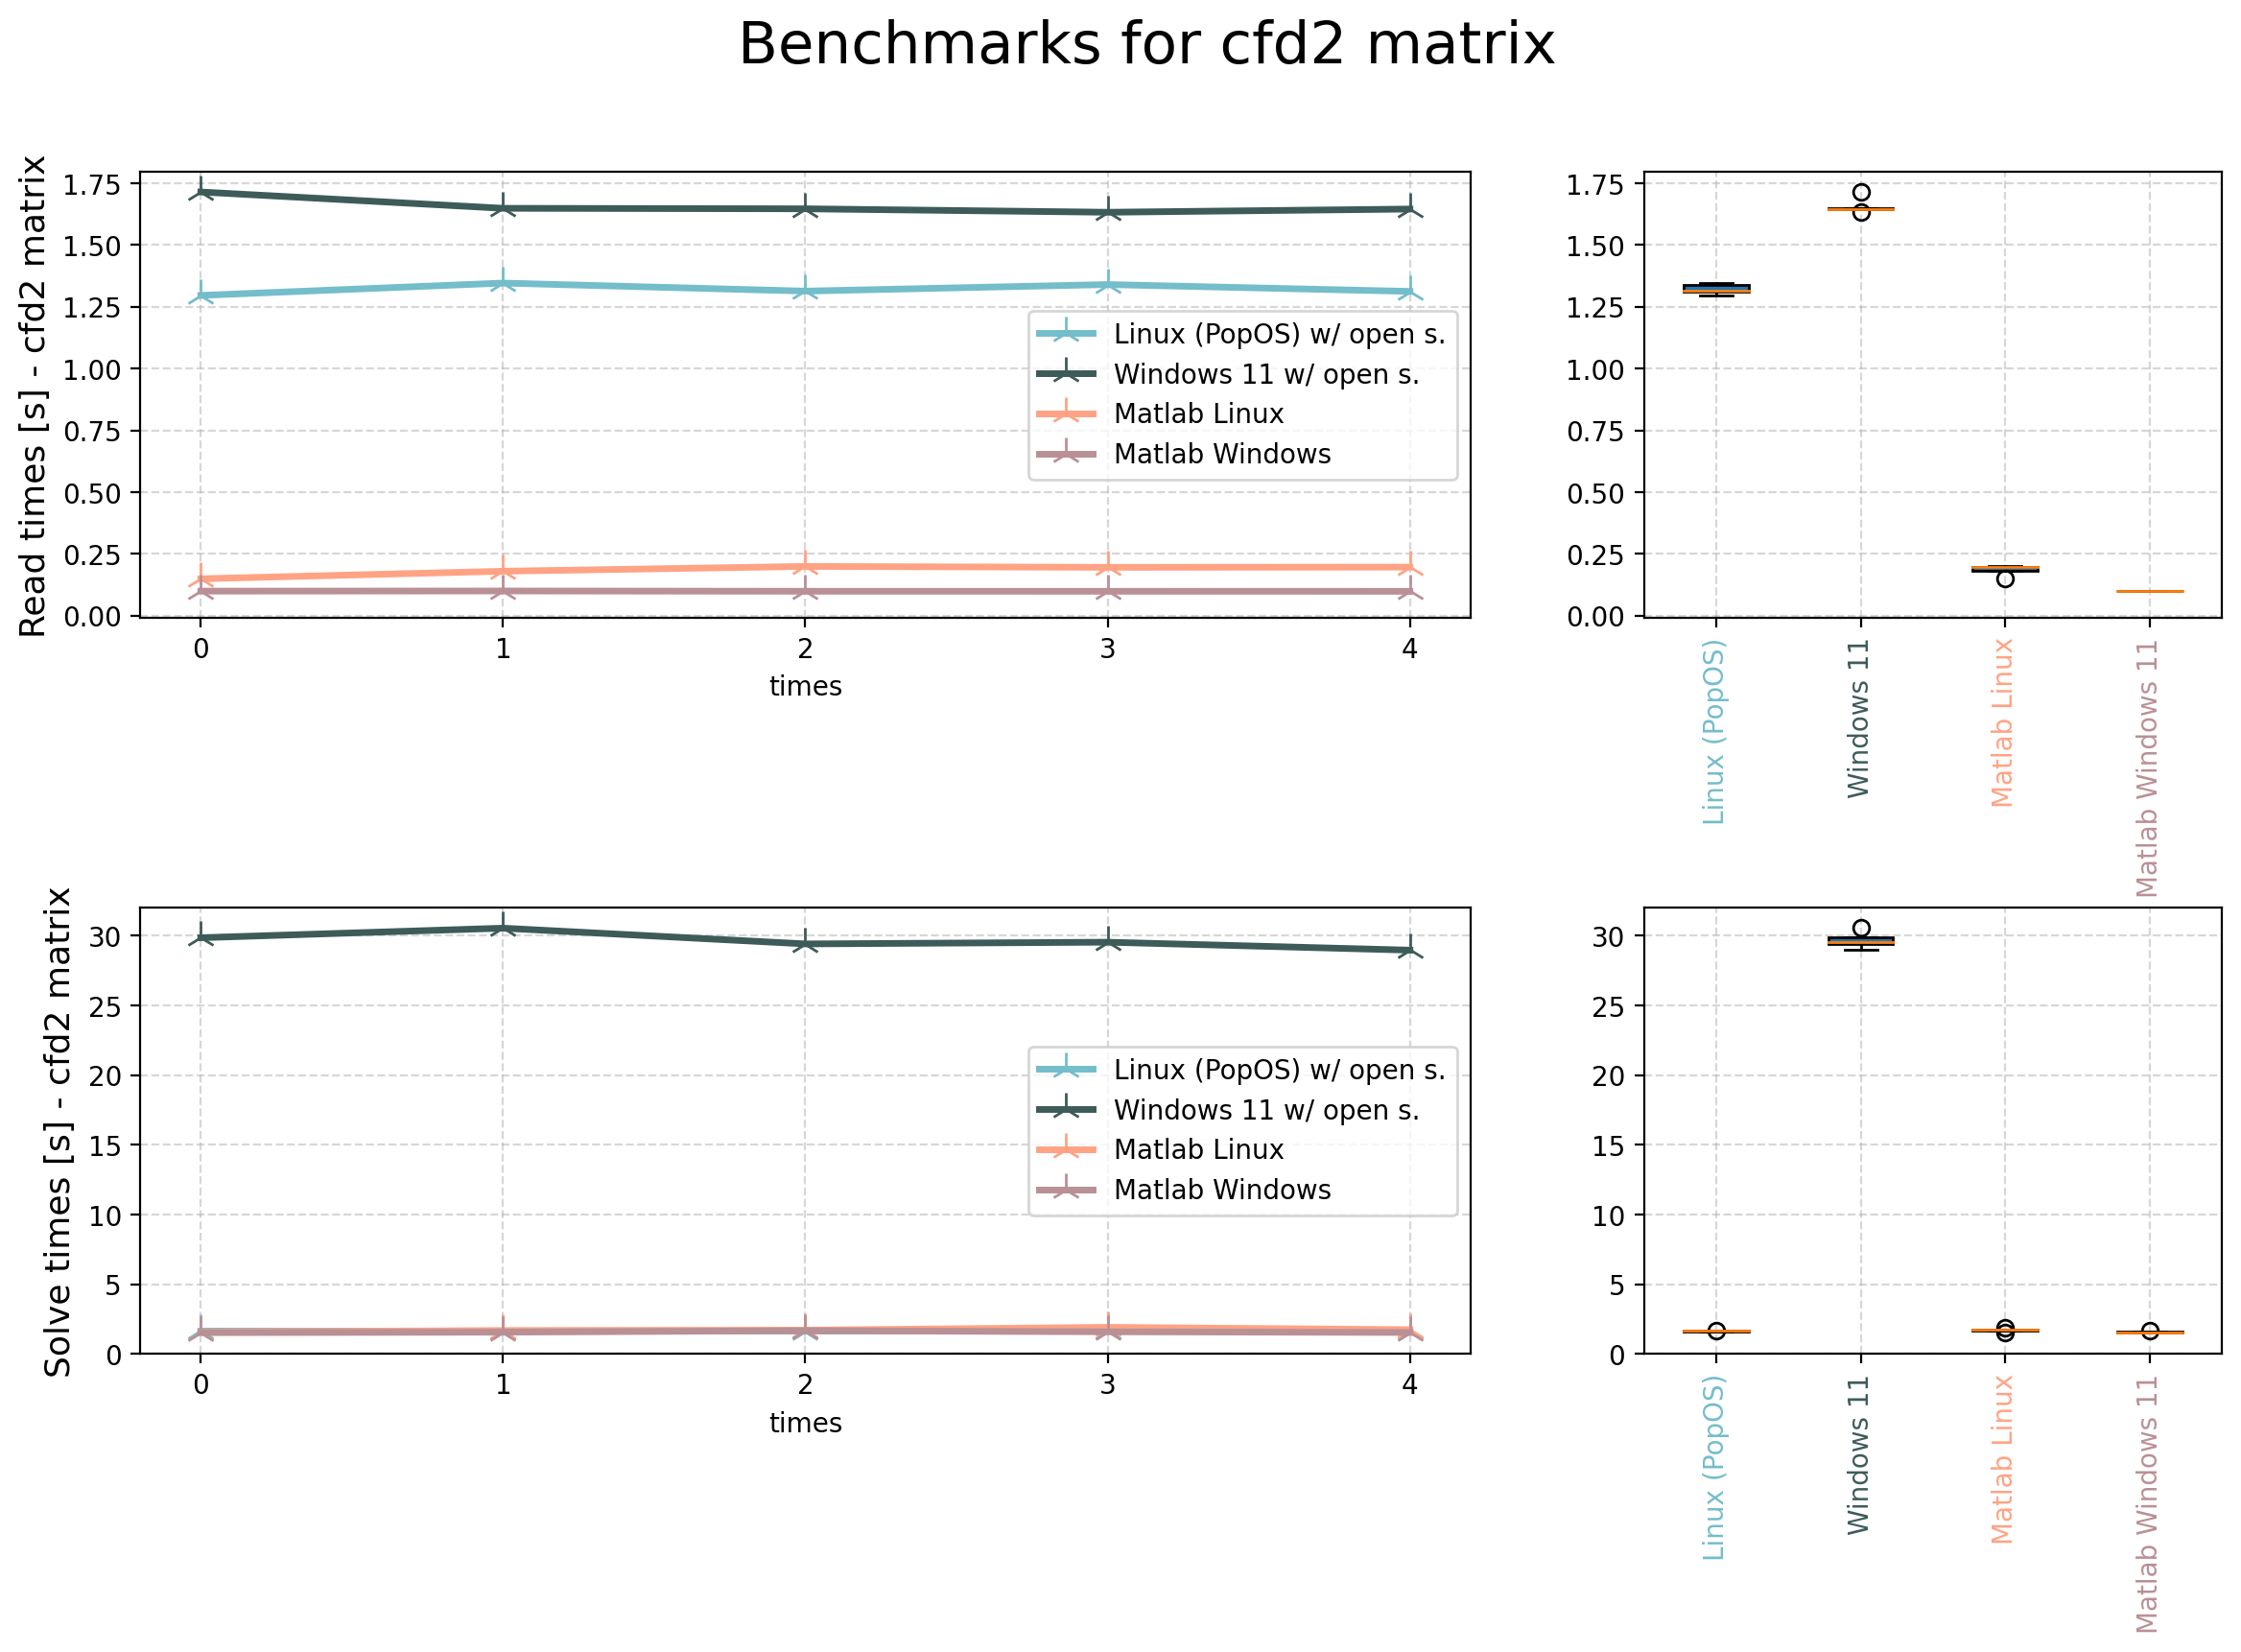

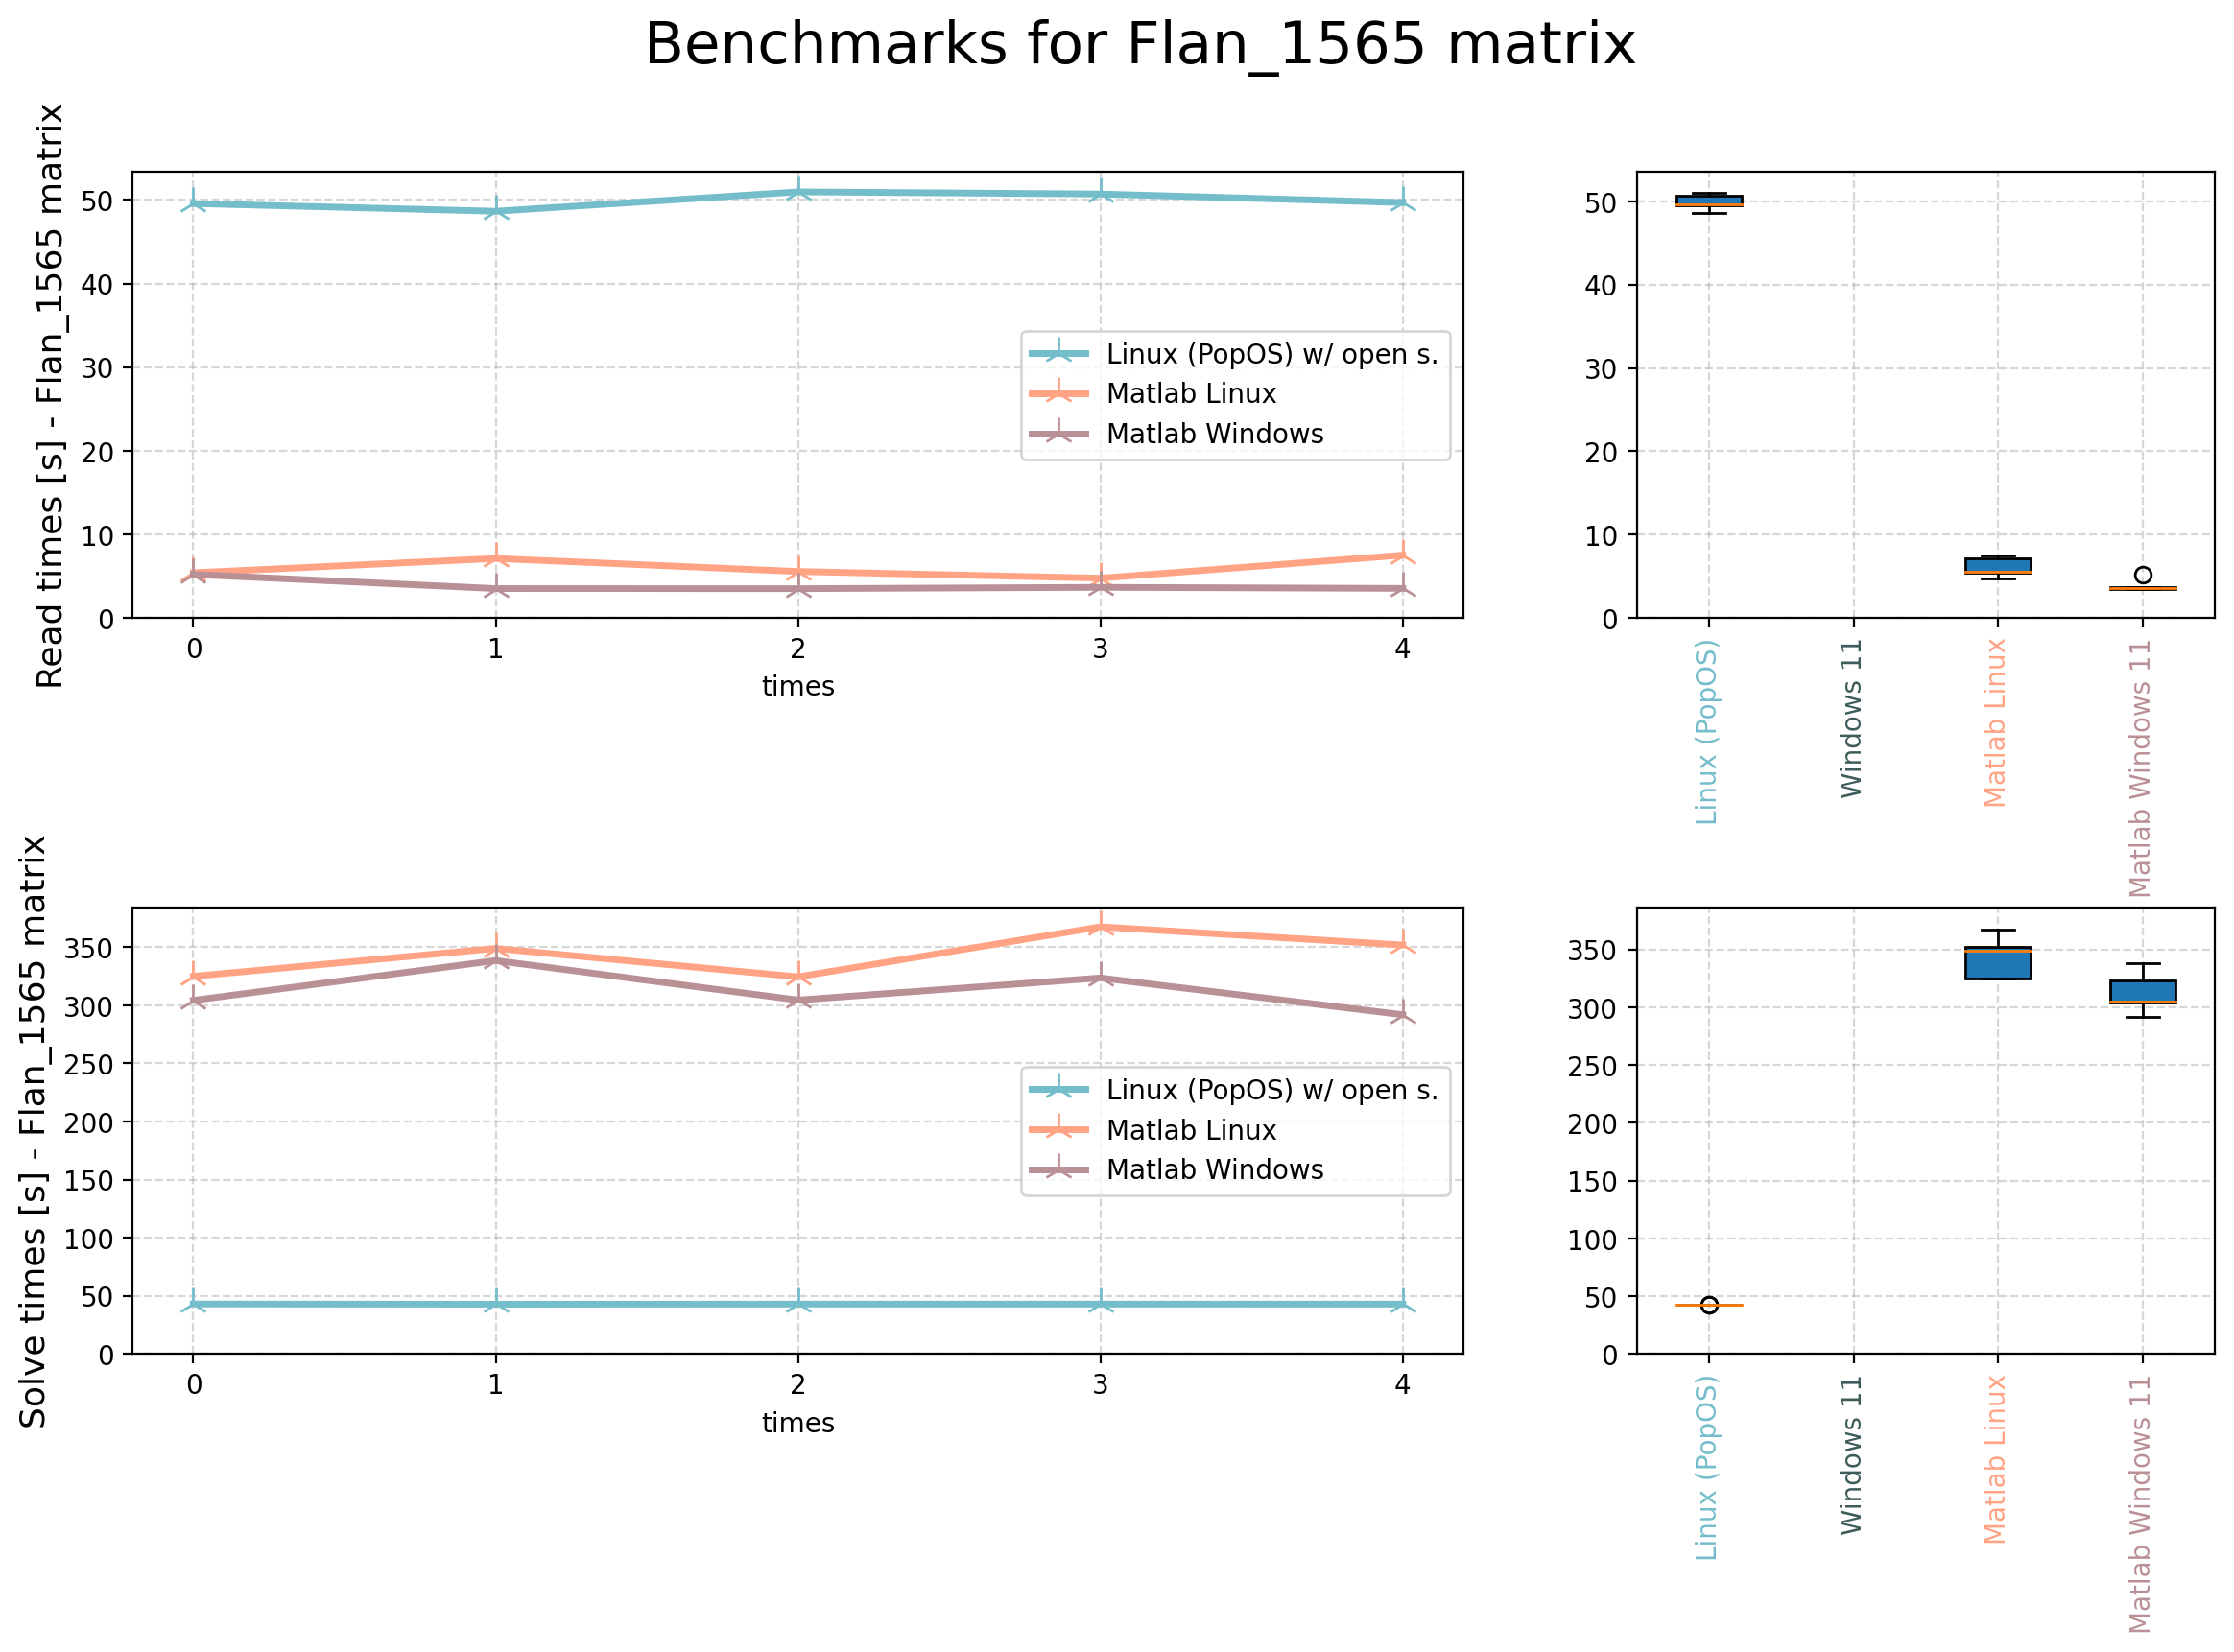

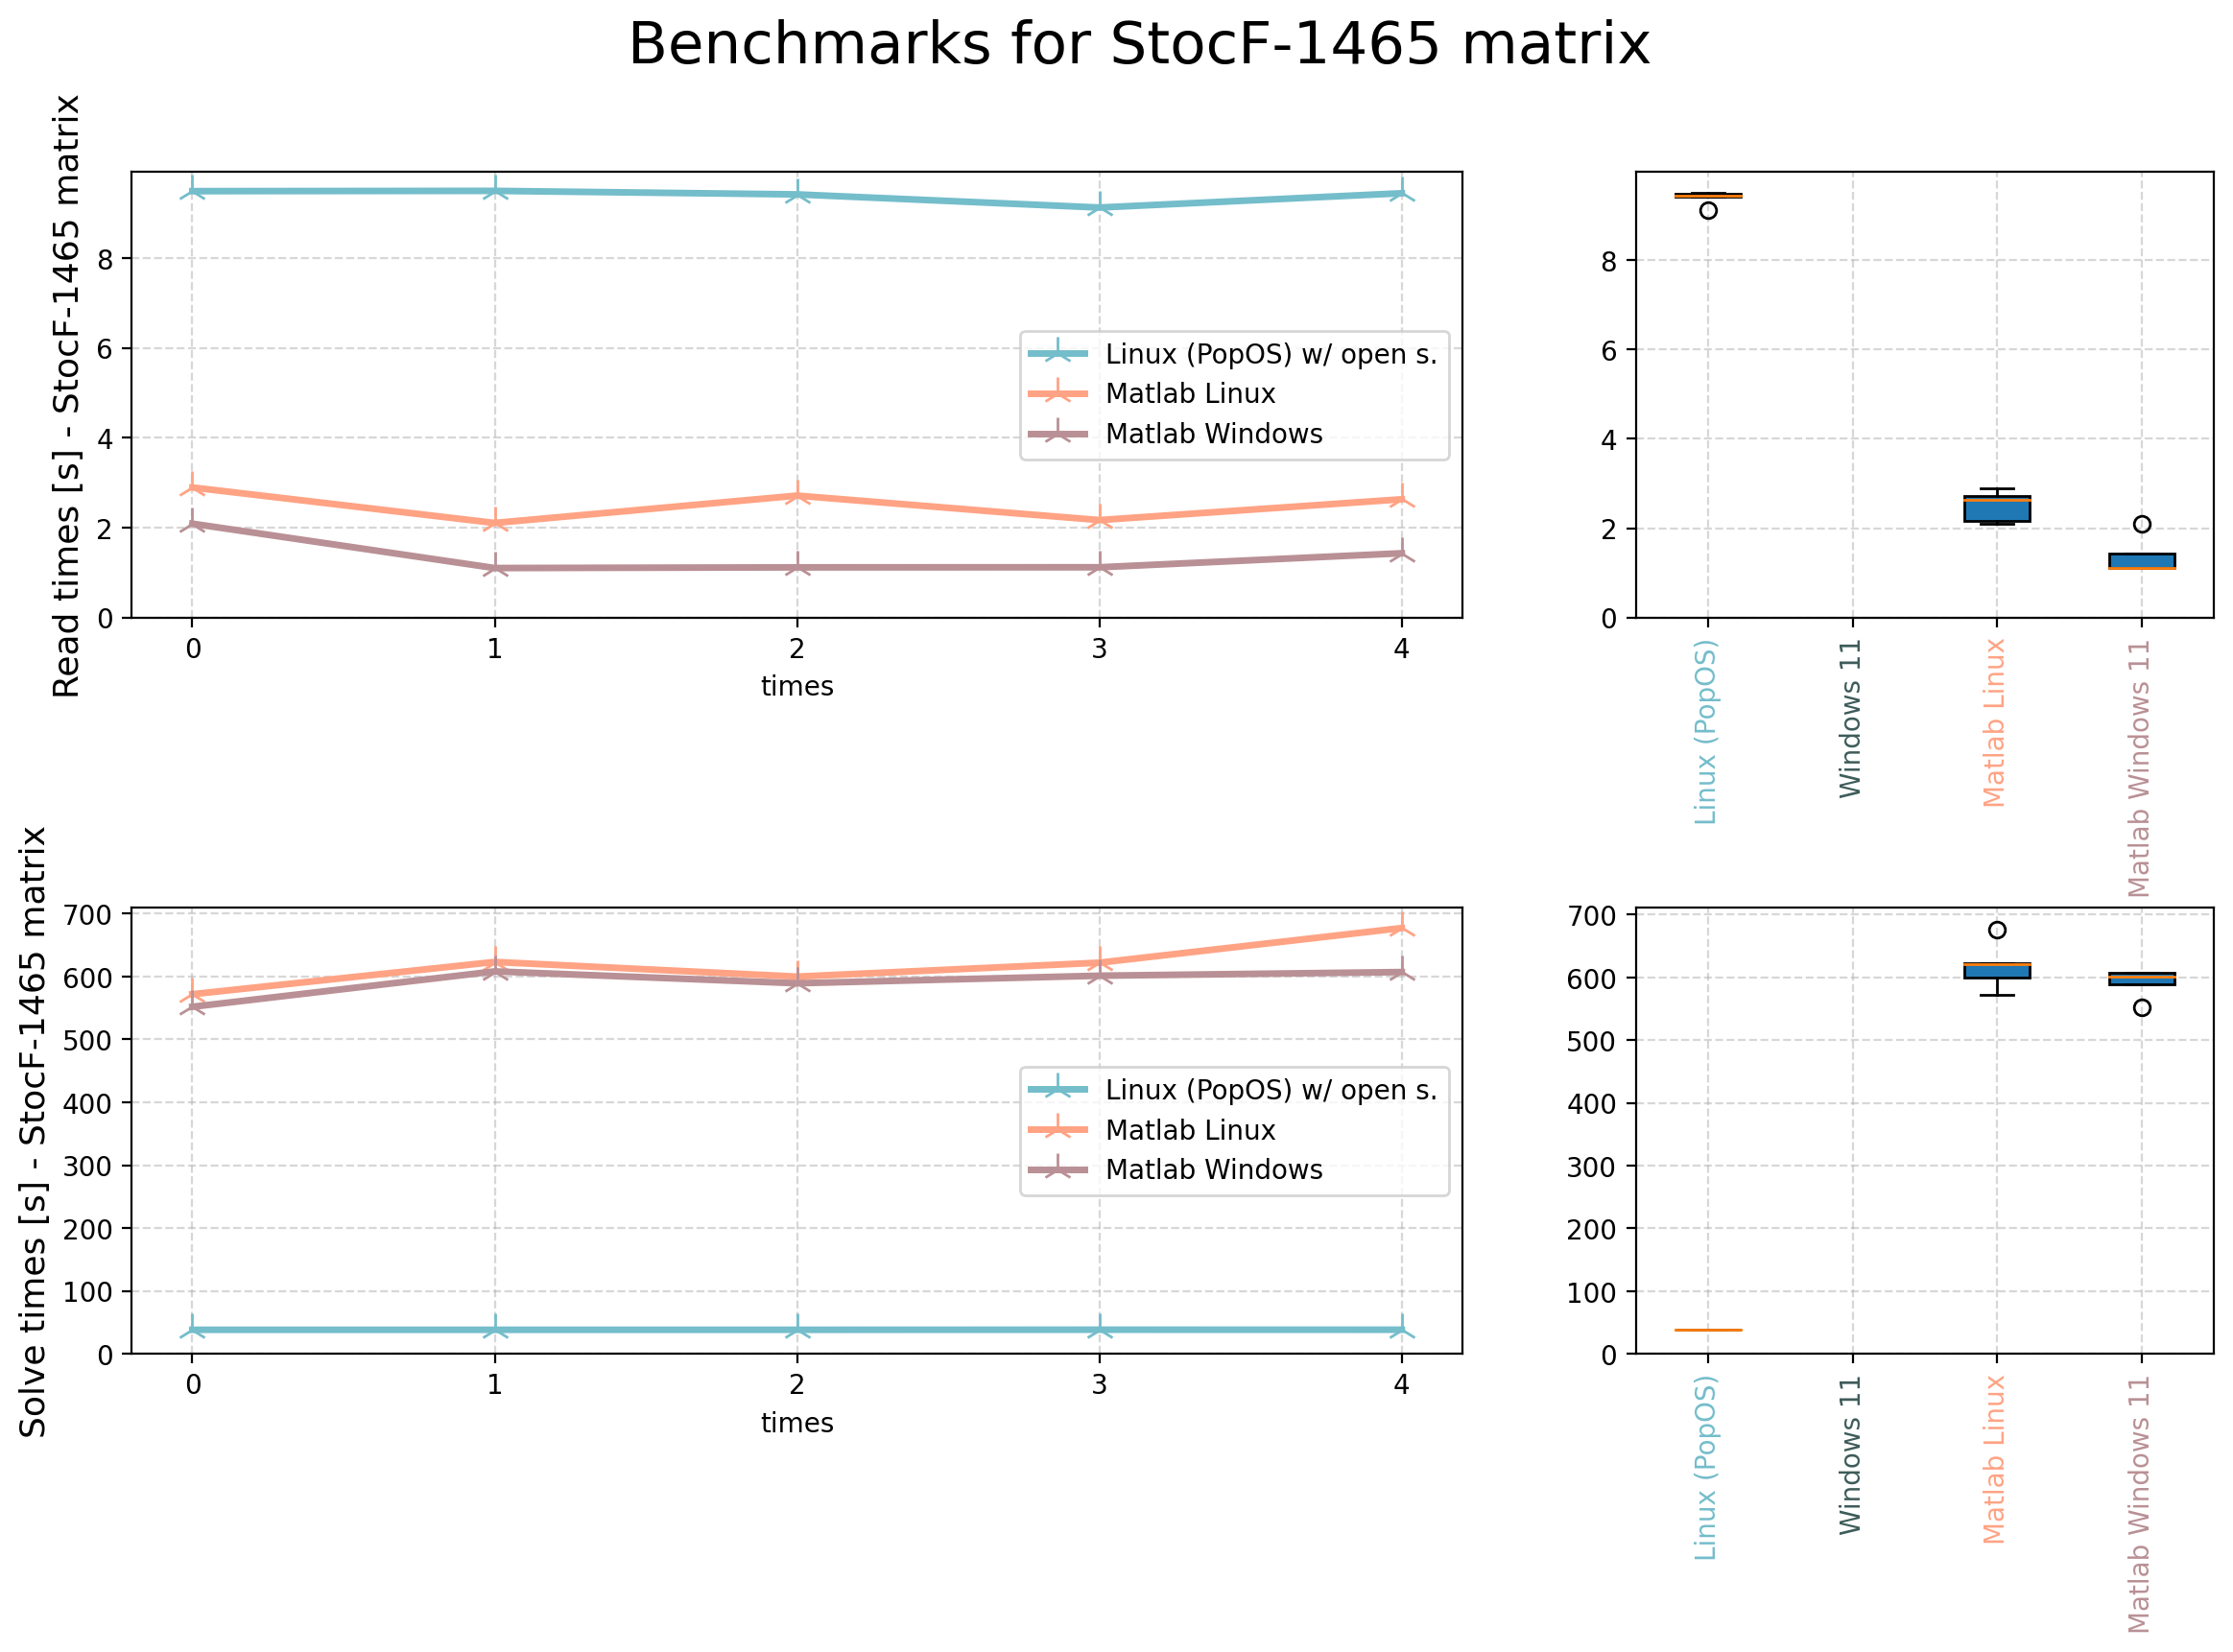

In [154]:
# chart su read times, boxplot su read times (3/4, 1/4)
# chart su solve times, boxplot su solve times (3/4, 1/4)
color = ['#74BDCB', '#3D5B59', '#FFA384', '#B99095']

for matrixL, matrixW, matrixML, matrixMW in zip(benchmarks['Linux_4_luglio_2'], benchmarks['Windows_4_luglio'], benchmarks['MatlabWindows_'], benchmarks['MatlabLinux_']):
    fig = plt.figure(figsize = (14, 8), dpi = 200)
    fig.suptitle(f'Benchmarks for {matrixL["matrix"].split(".")[0]} matrix', fontsize = 22)

    grid = plt.GridSpec(2, 3, wspace=0.3, hspace=0.65, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    
    # ax1.set_title(f'Read times [s] for {matrixL["matrix"].split(".")[0]} matrix')
    if matrixL["relative_error"] != 0:
        ax1.plot(matrixL["read_times"], label = 'Linux (PopOS) w/ open s.', color = color[0], marker = '2', markersize = 12, linewidth = 2.5)
    if matrixW["relative_error"] != 0:
        ax1.plot(matrixW["read_times"], label = 'Windows 11 w/ open s.', color = color[1], marker = '2', markersize = 12, linewidth = 2.5)
    if matrixML["relative_error"] != 0:
        ax1.plot(matrixML["read_times"], label = 'Matlab Linux', color = color[2], marker = '2', markersize = 12, linewidth = 2.5)
    if matrixMW["relative_error"] != 0:
        ax1.plot(matrixMW["read_times"], label = 'Matlab Windows', color = color[3], marker = '2', markersize = 12, linewidth = 2.5)
    ax1.set_xlabel('times')
    ax1.set_ylabel(f'Read times [s] - {matrixL["matrix"].split(".")[0]} matrix', fontsize = 13)
    ax1.set_xticks([0, 1, 2, 3, 4])
    ax1.set_ylim(bottom = -0.01)
    #if max(max(matrixL["read_times"]), max(matrixW["read_times"])) < 30:
    #    ax1.set_ylim(bottom = -0.2, top = max(max(matrixL["read_times"]), max(matrixW["read_times"])) + 1)
    #else:
    #    ax1.set_ylim(bottom = -0.2, top = max(max(matrixL["read_times"]), max(matrixW["read_times"])) + 10)
    ax1.legend()
    ax1.grid(linestyle='--', alpha = 0.5)



    ax2 = fig.add_subplot(grid[0, 2])
    ax2.boxplot(
        [matrixL["read_times"], matrixW["read_times"], matrixML['read_times'], matrixMW['read_times']], 
        patch_artist=True,
        )
    ax2.set_xticklabels(['Linux (PopOS)', 'Windows 11', 'Matlab Linux', 'Matlab Windows 11'], rotation = 'vertical')
    ax2.set_ylim(bottom = -0.01)
    ax2.grid(linestyle='--', alpha = 0.5)
    for xtick, c in zip(ax2.get_xticklabels(), color):
        xtick.set_color(c)


    ax3 = fig.add_subplot(grid[1, :2])
    # ax3.set_title(f'Solve times [s] for {matrixL["matrix"].split(".")[0]} matrix')
    if matrixL["relative_error"] != 0:
        ax3.plot(matrixL["solve_times"], label = 'Linux (PopOS) w/ open s.', color = color[0], marker = '2', markersize = 12, linewidth = 2.5)
    if matrixW["relative_error"] != 0:
        ax3.plot(matrixW["solve_times"], label = 'Windows 11 w/ open s.', color = color[1], marker = '2', markersize = 12, linewidth = 2.5)
    if matrixML["relative_error"] != 0:
        ax3.plot(matrixML["solve_times"], label = 'Matlab Linux', color = color[2], marker = '2', markersize = 12, linewidth = 2.5)
    if matrixMW["relative_error"] != 0:
        ax3.plot(matrixMW["solve_times"], label = 'Matlab Windows', color = color[3], marker = '2', markersize = 12, linewidth = 2.5)
    ax3.set_xlabel('times')
    ax3.set_ylabel(f'Solve times [s] - {matrixL["matrix"].split(".")[0]} matrix', fontsize = 13)
    ax3.set_xticks([0, 1, 2, 3, 4])
    ax3.set_ylim(bottom = -0.01)
    ax3.legend()
    ax3.grid(linestyle='--', alpha = 0.5)
    

    ax4 = fig.add_subplot(grid[1, 2])
    ax4.boxplot([matrixL["solve_times"], matrixW["solve_times"], matrixML['solve_times'], matrixMW['solve_times']], patch_artist=True)
    ax4.set_xticklabels(['Linux (PopOS)', 'Windows 11', 'Matlab Linux', 'Matlab Windows 11'], rotation = 'vertical')
    ax4.set_ylim(bottom = -0.01)
    ax4.grid(linestyle='--', alpha = 0.5)
    for xtick, c in zip(ax4.get_xticklabels(), color):
        xtick.set_color(c)
    

    plt.savefig(f'images/{matrixL["matrix"].split(".")[0]}_times.png', dpi = 200)
    plt.show()

    

### Barplot

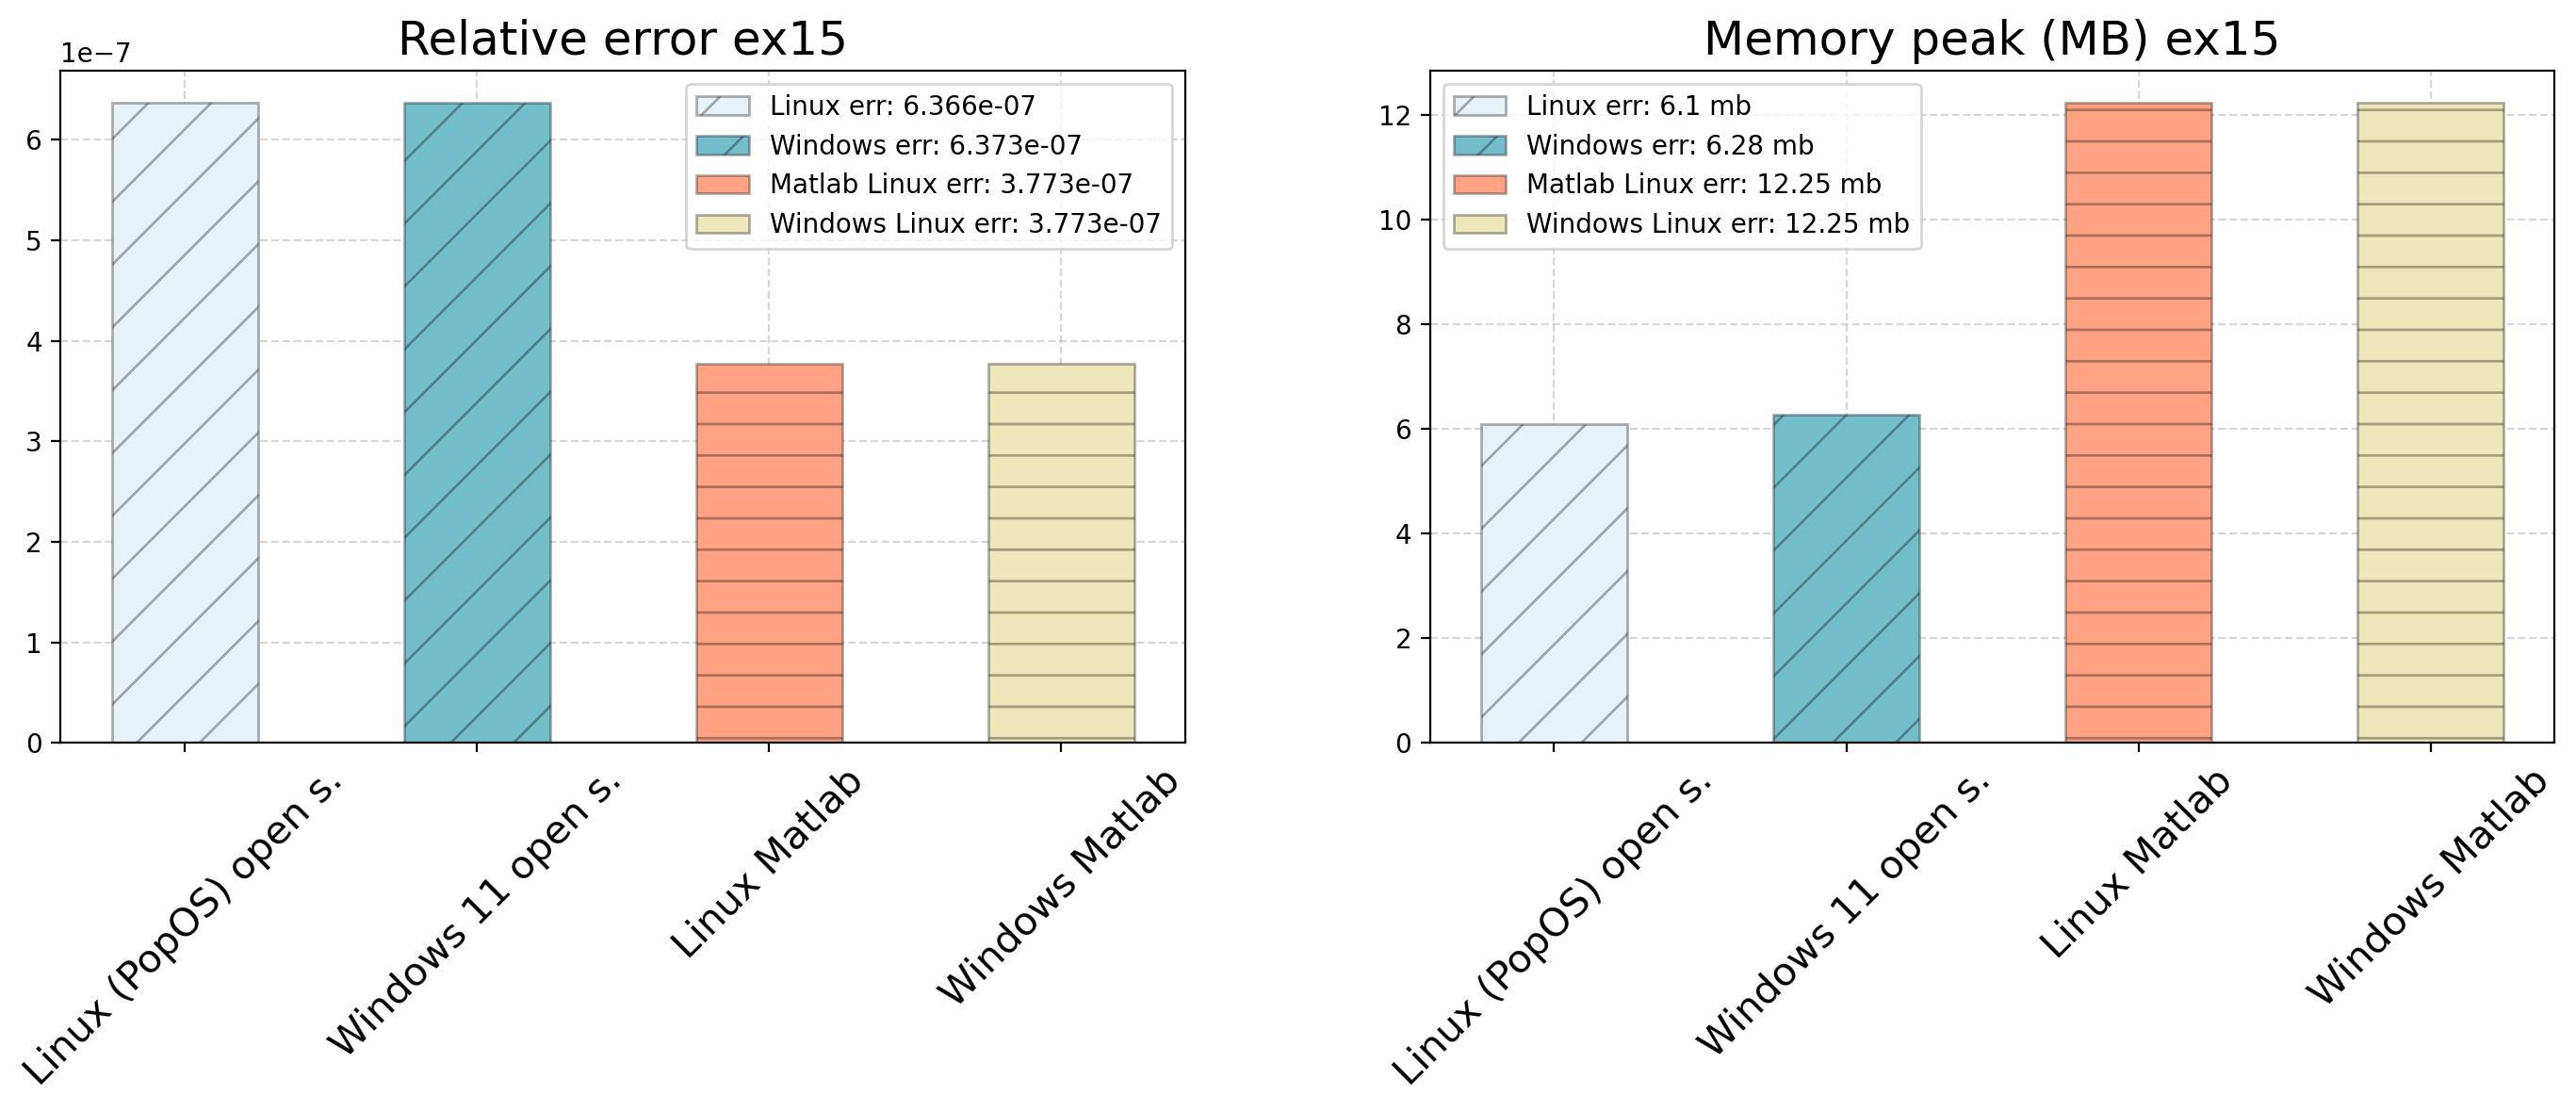

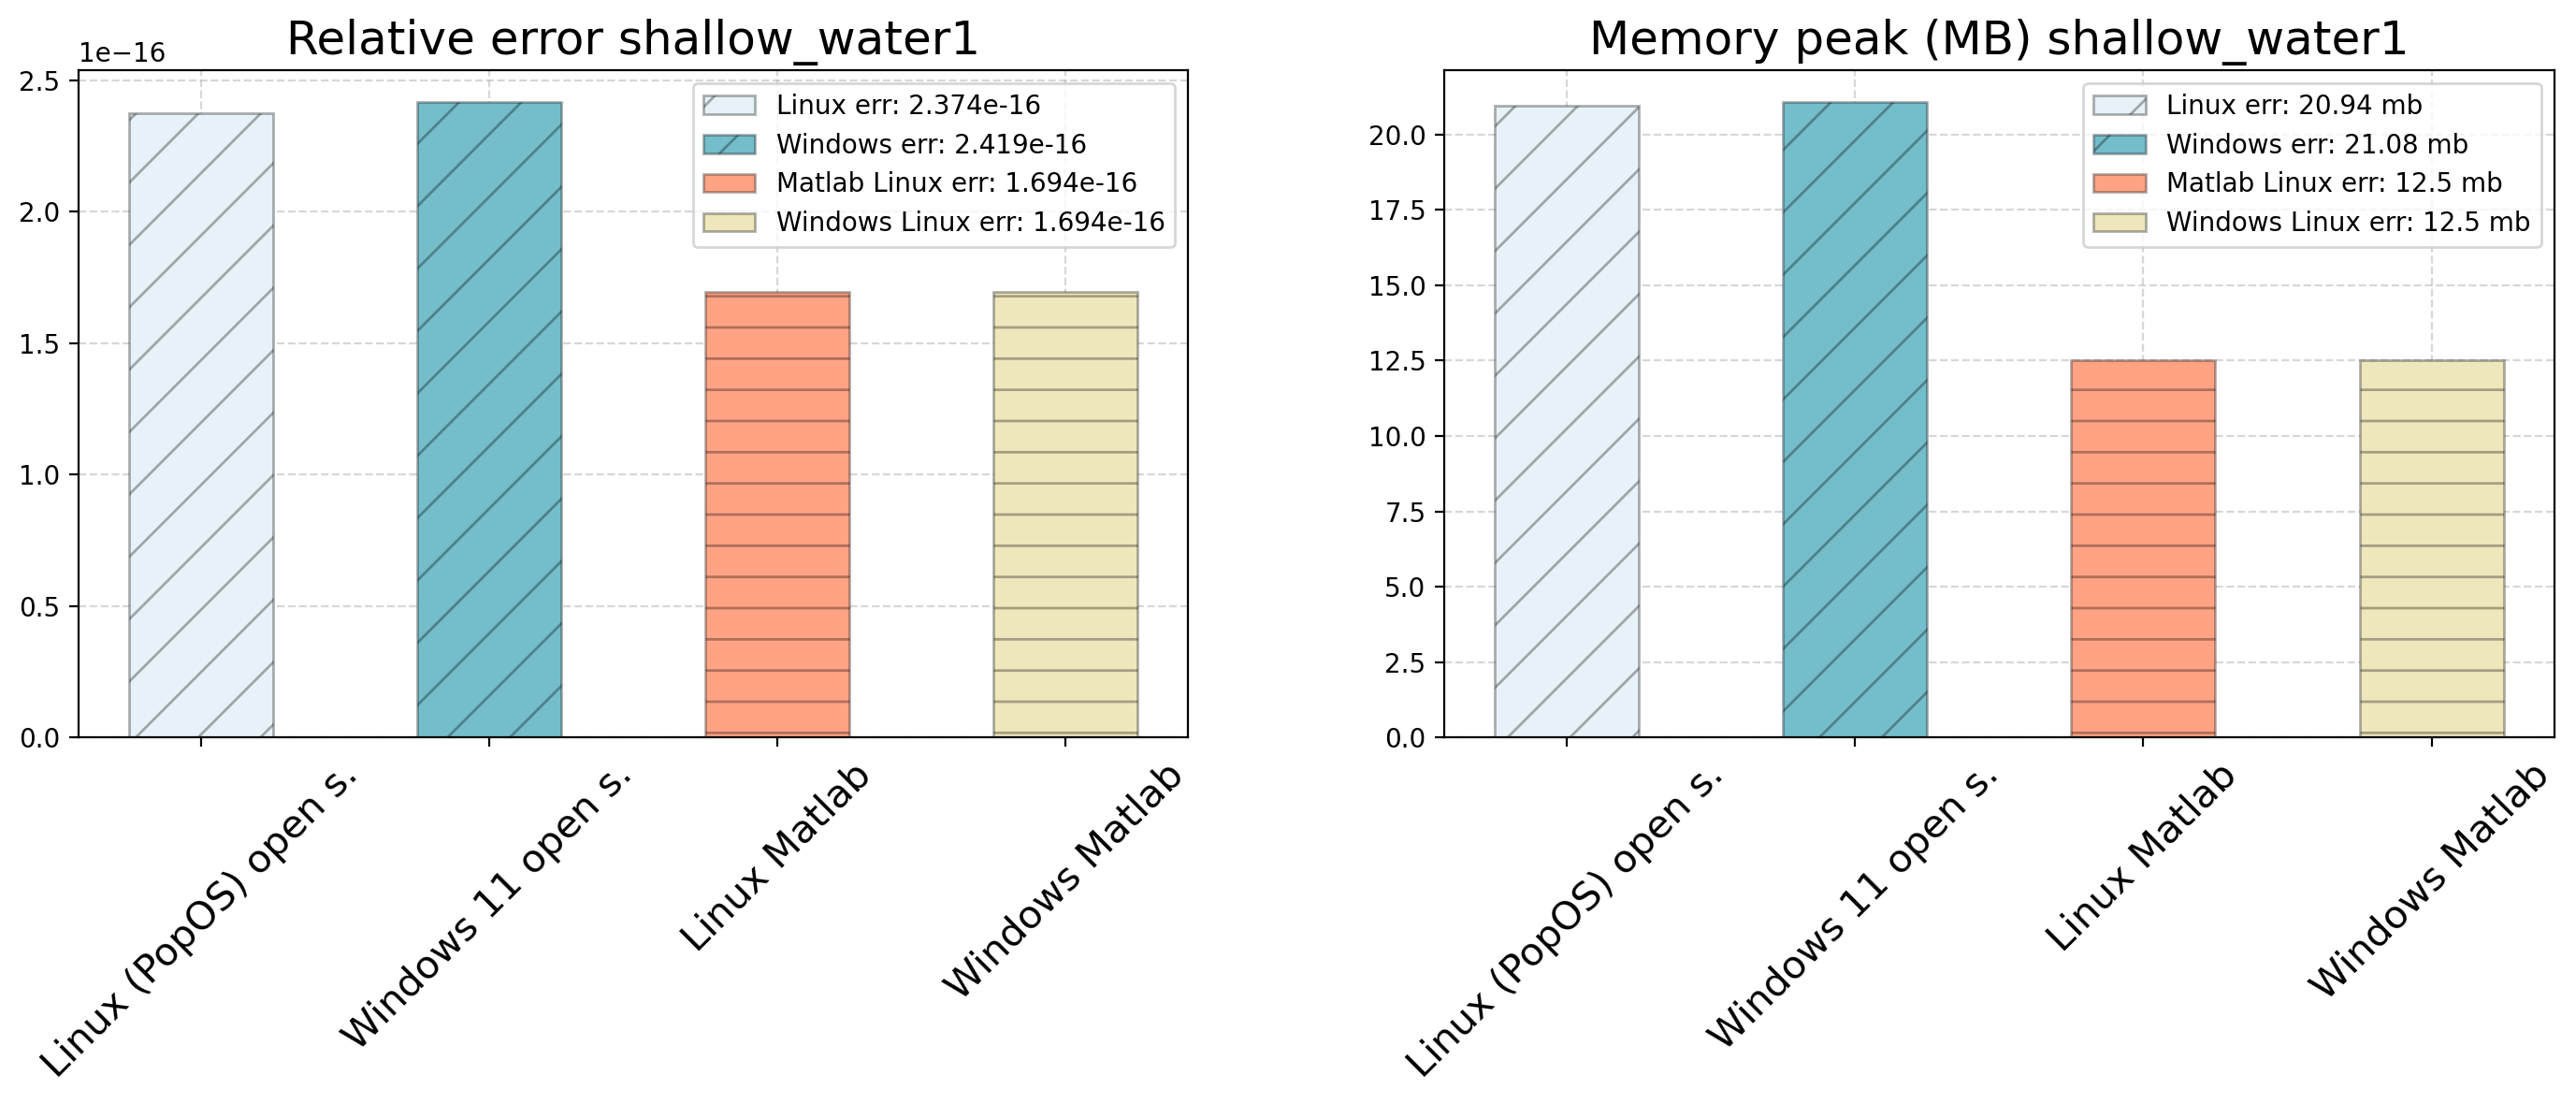

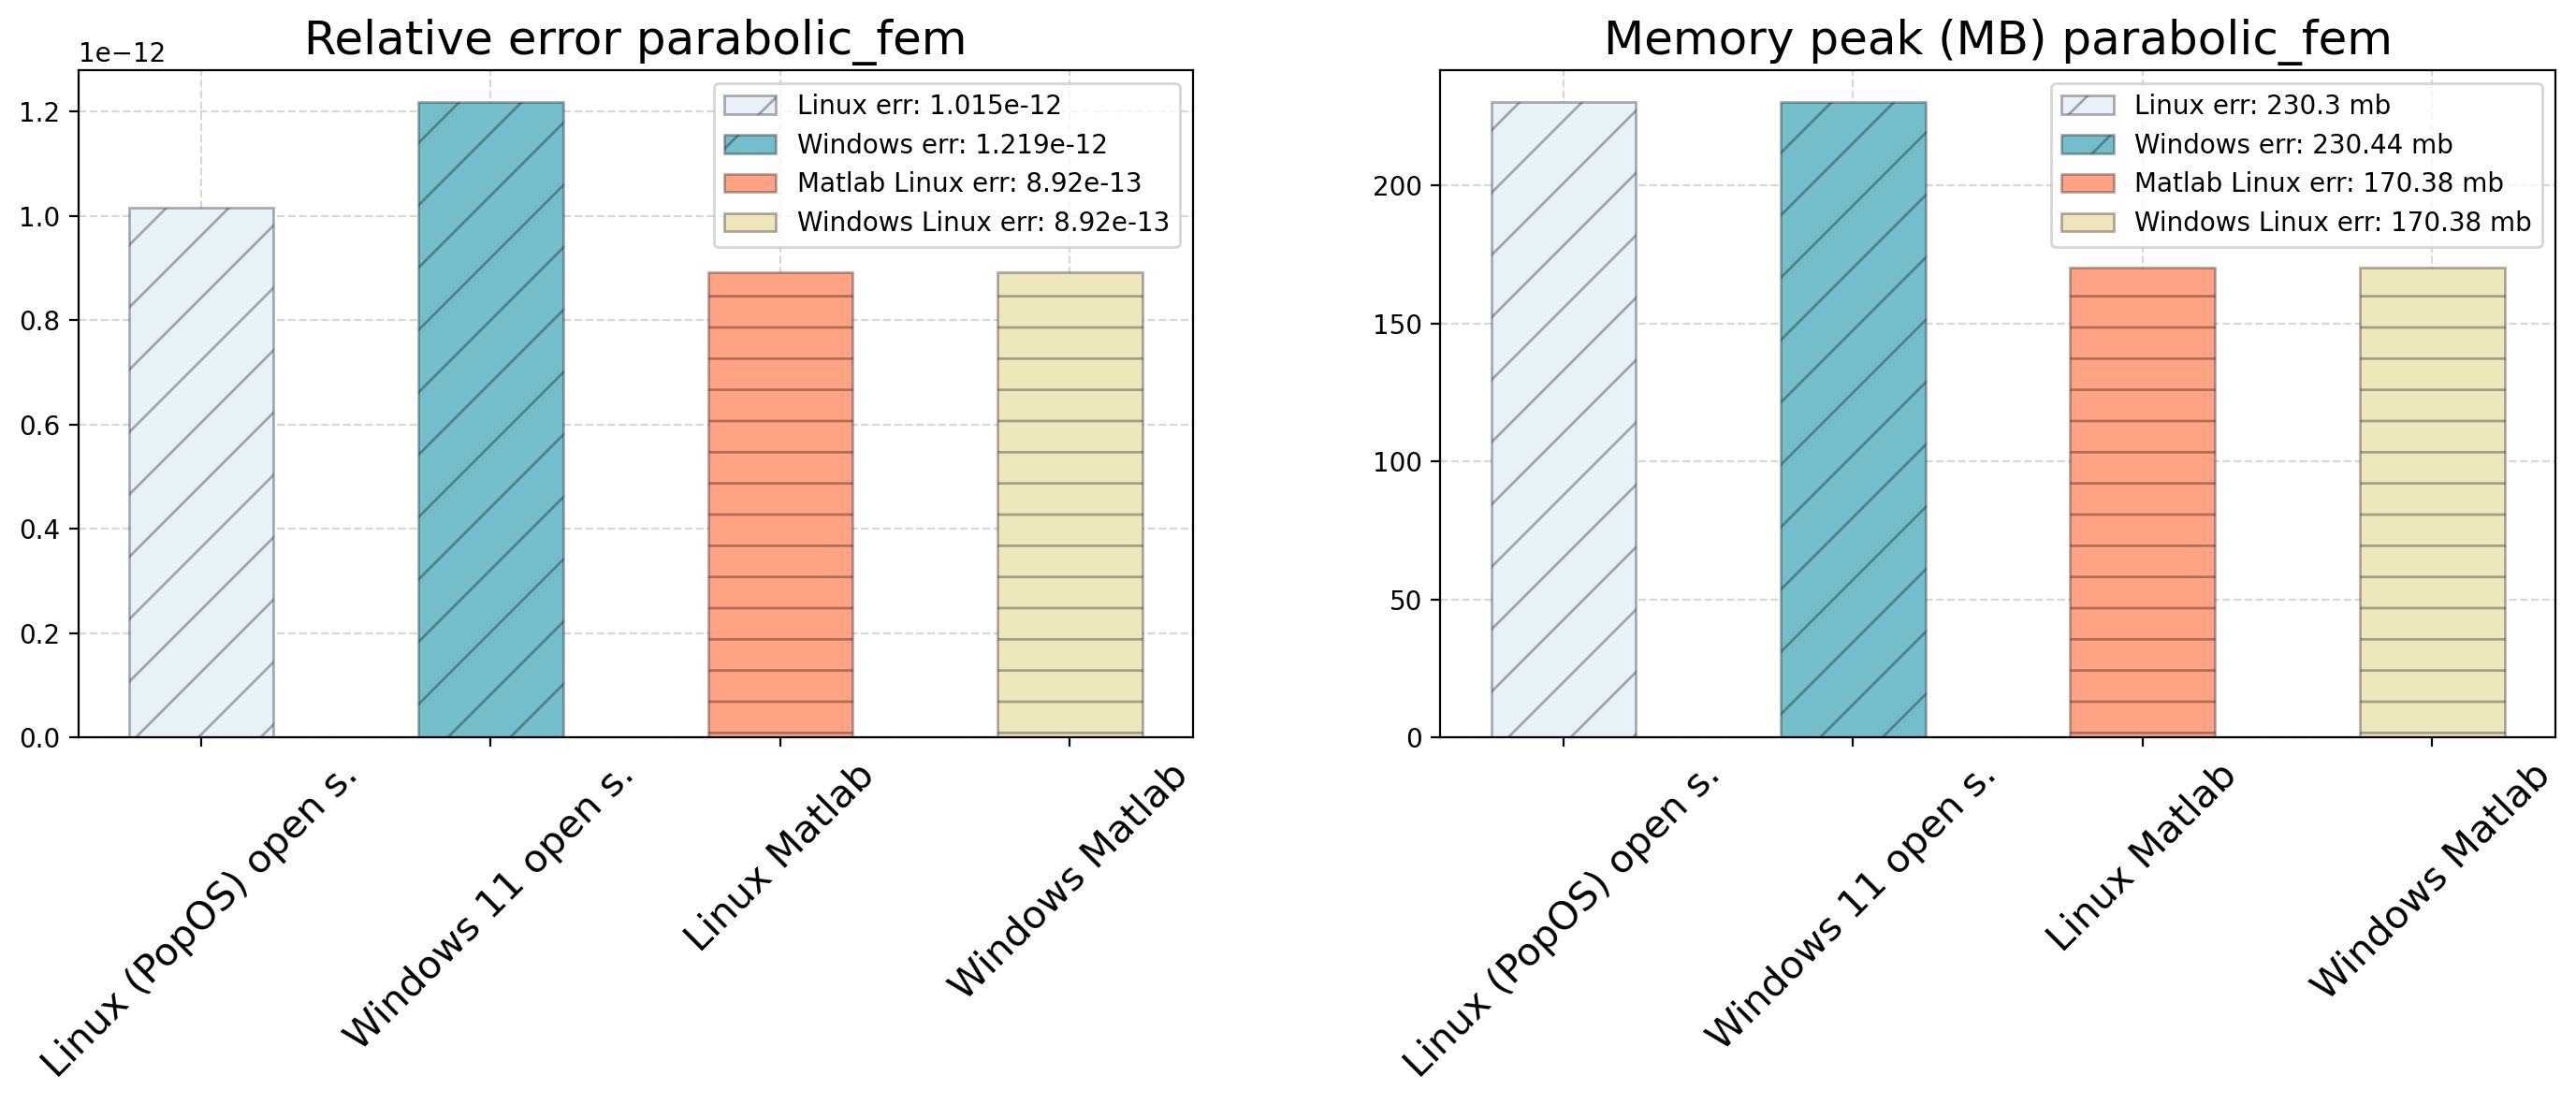

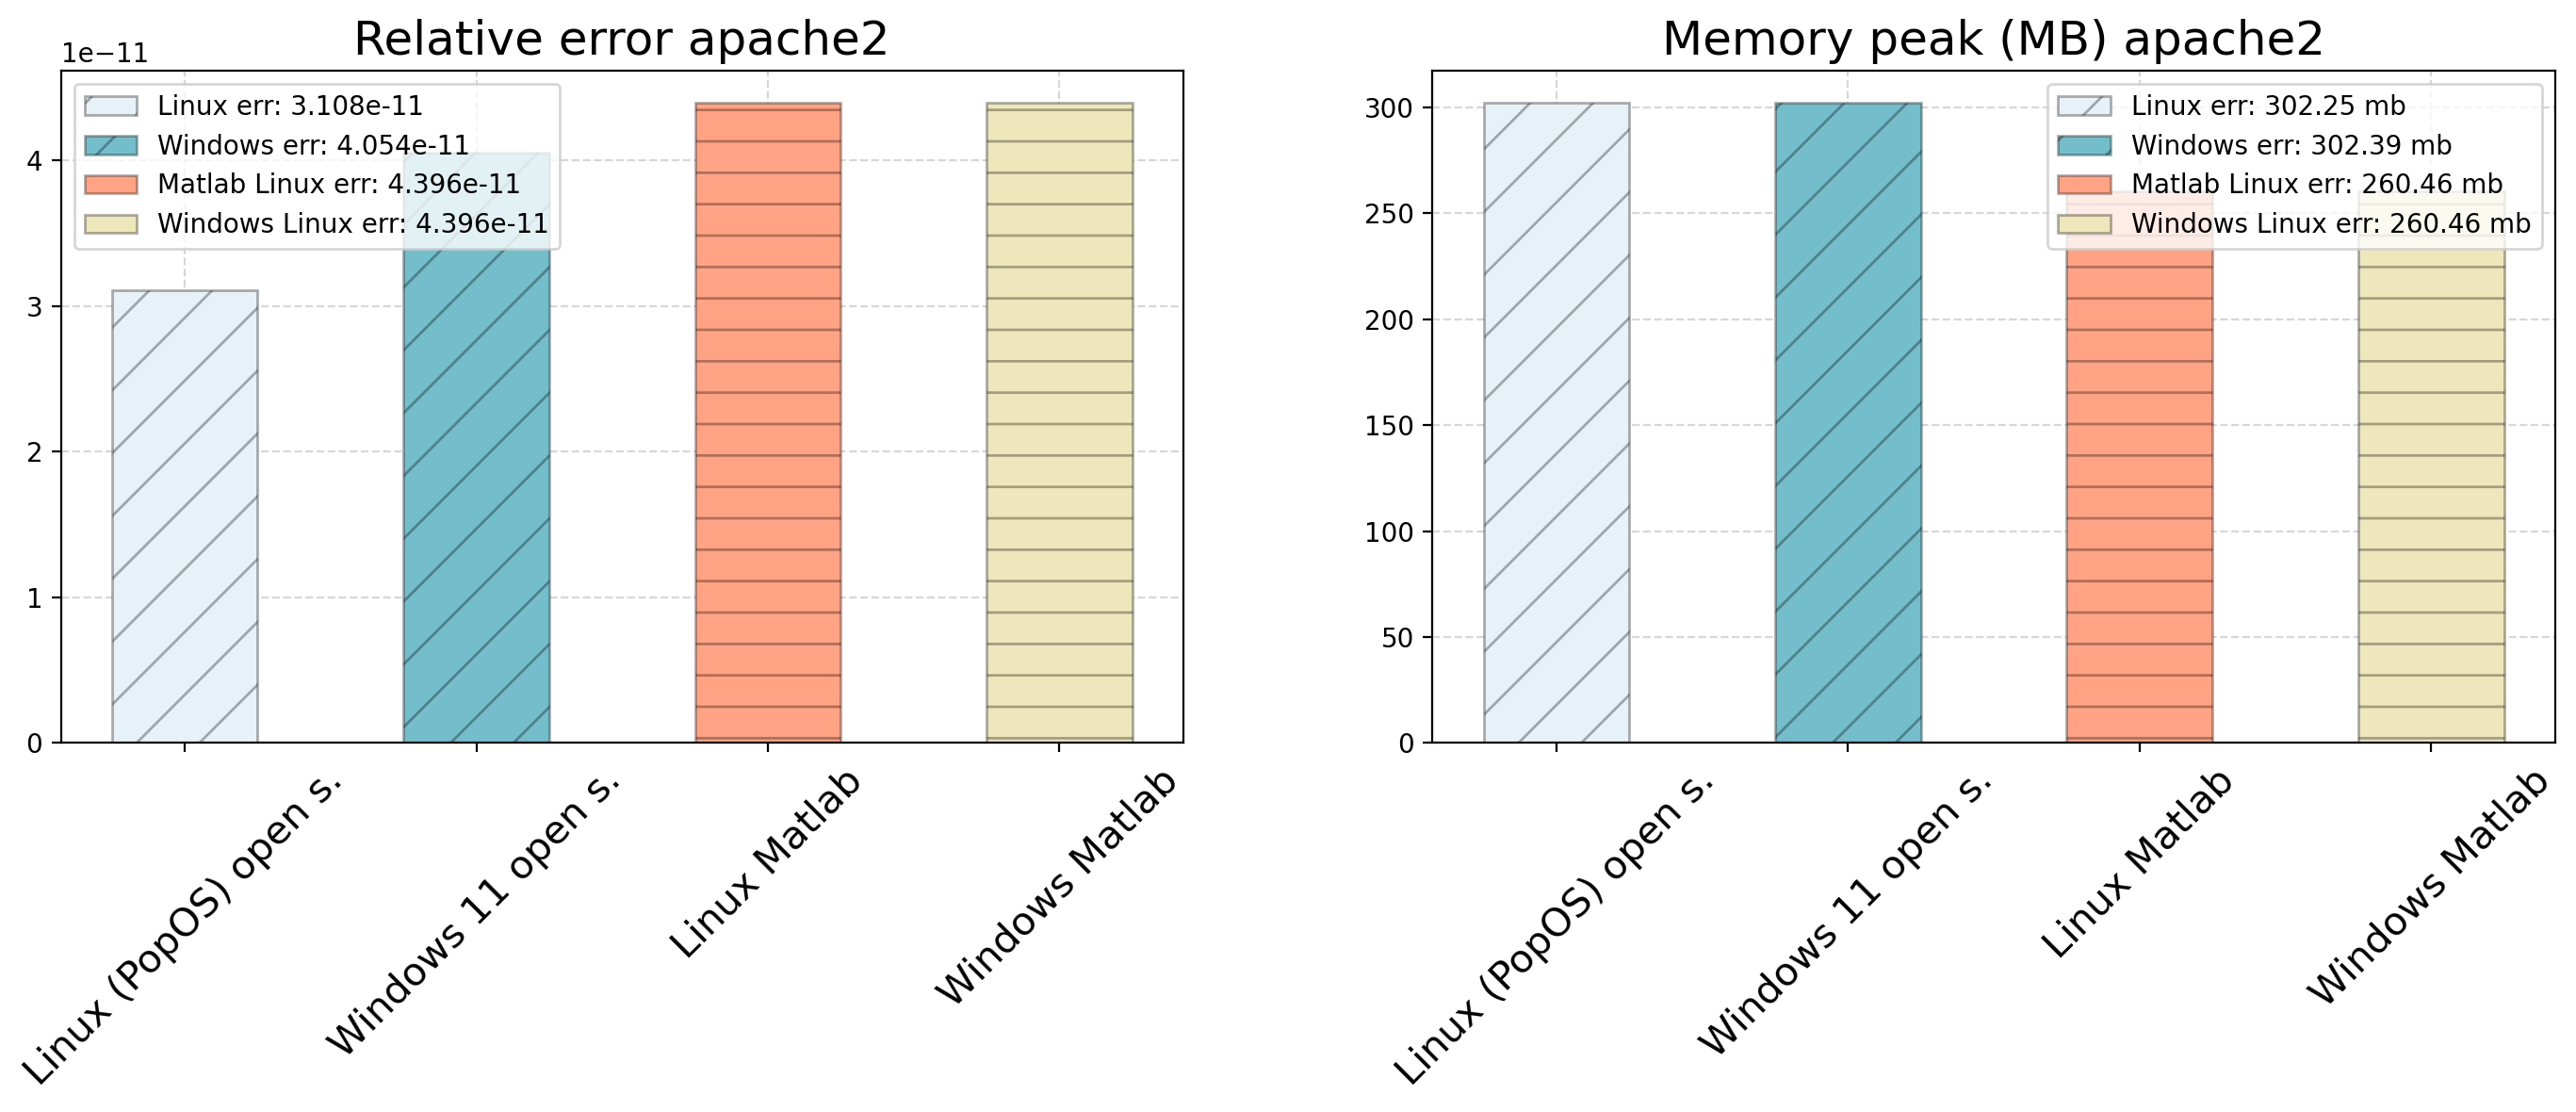

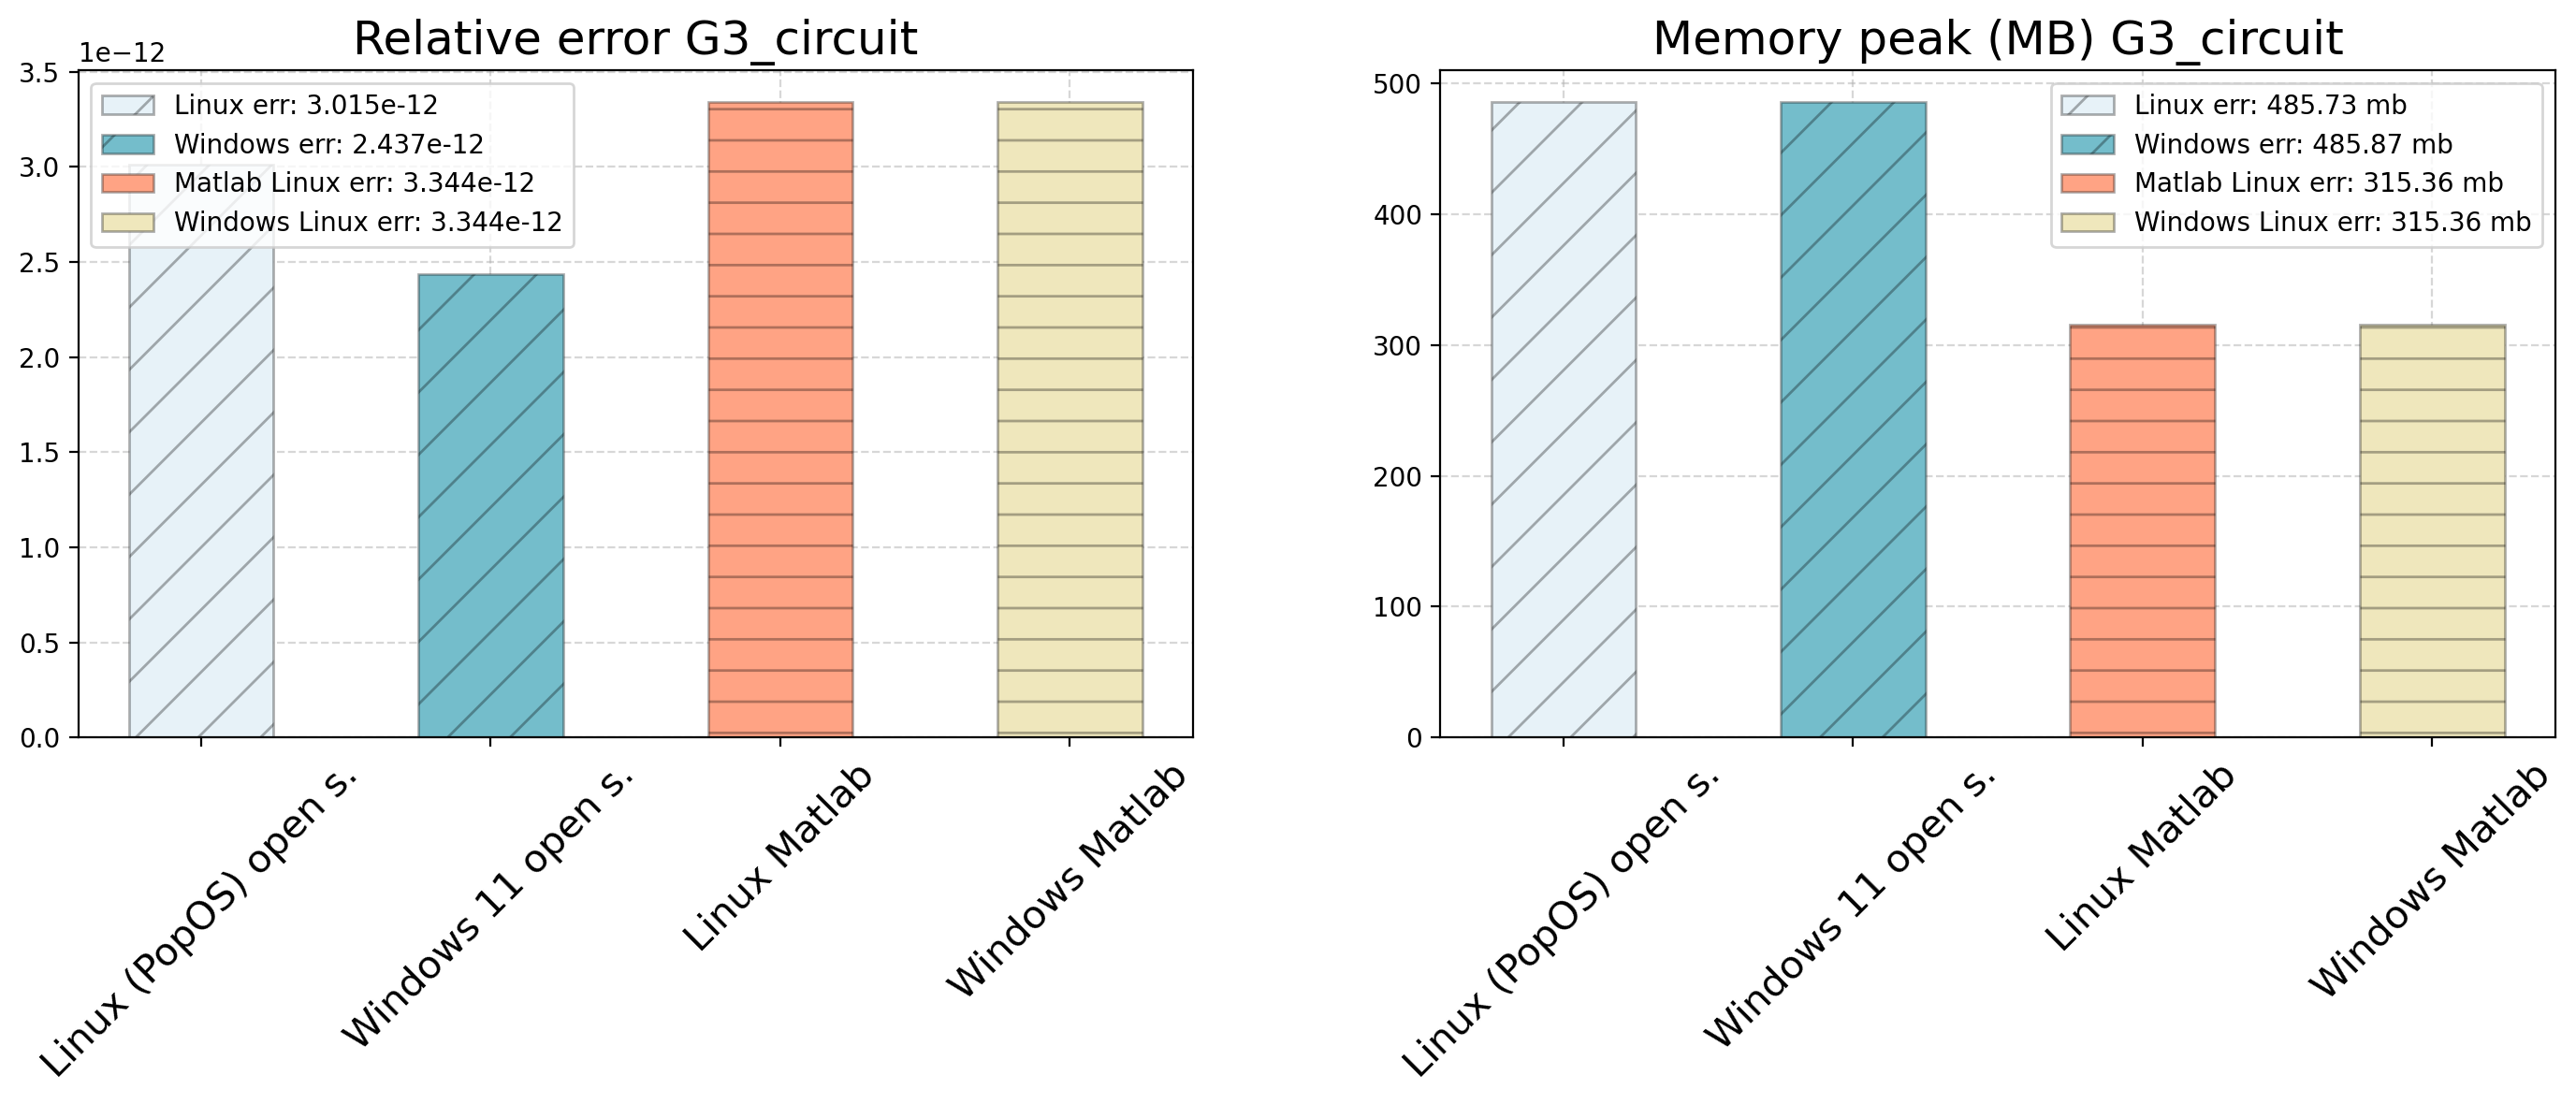

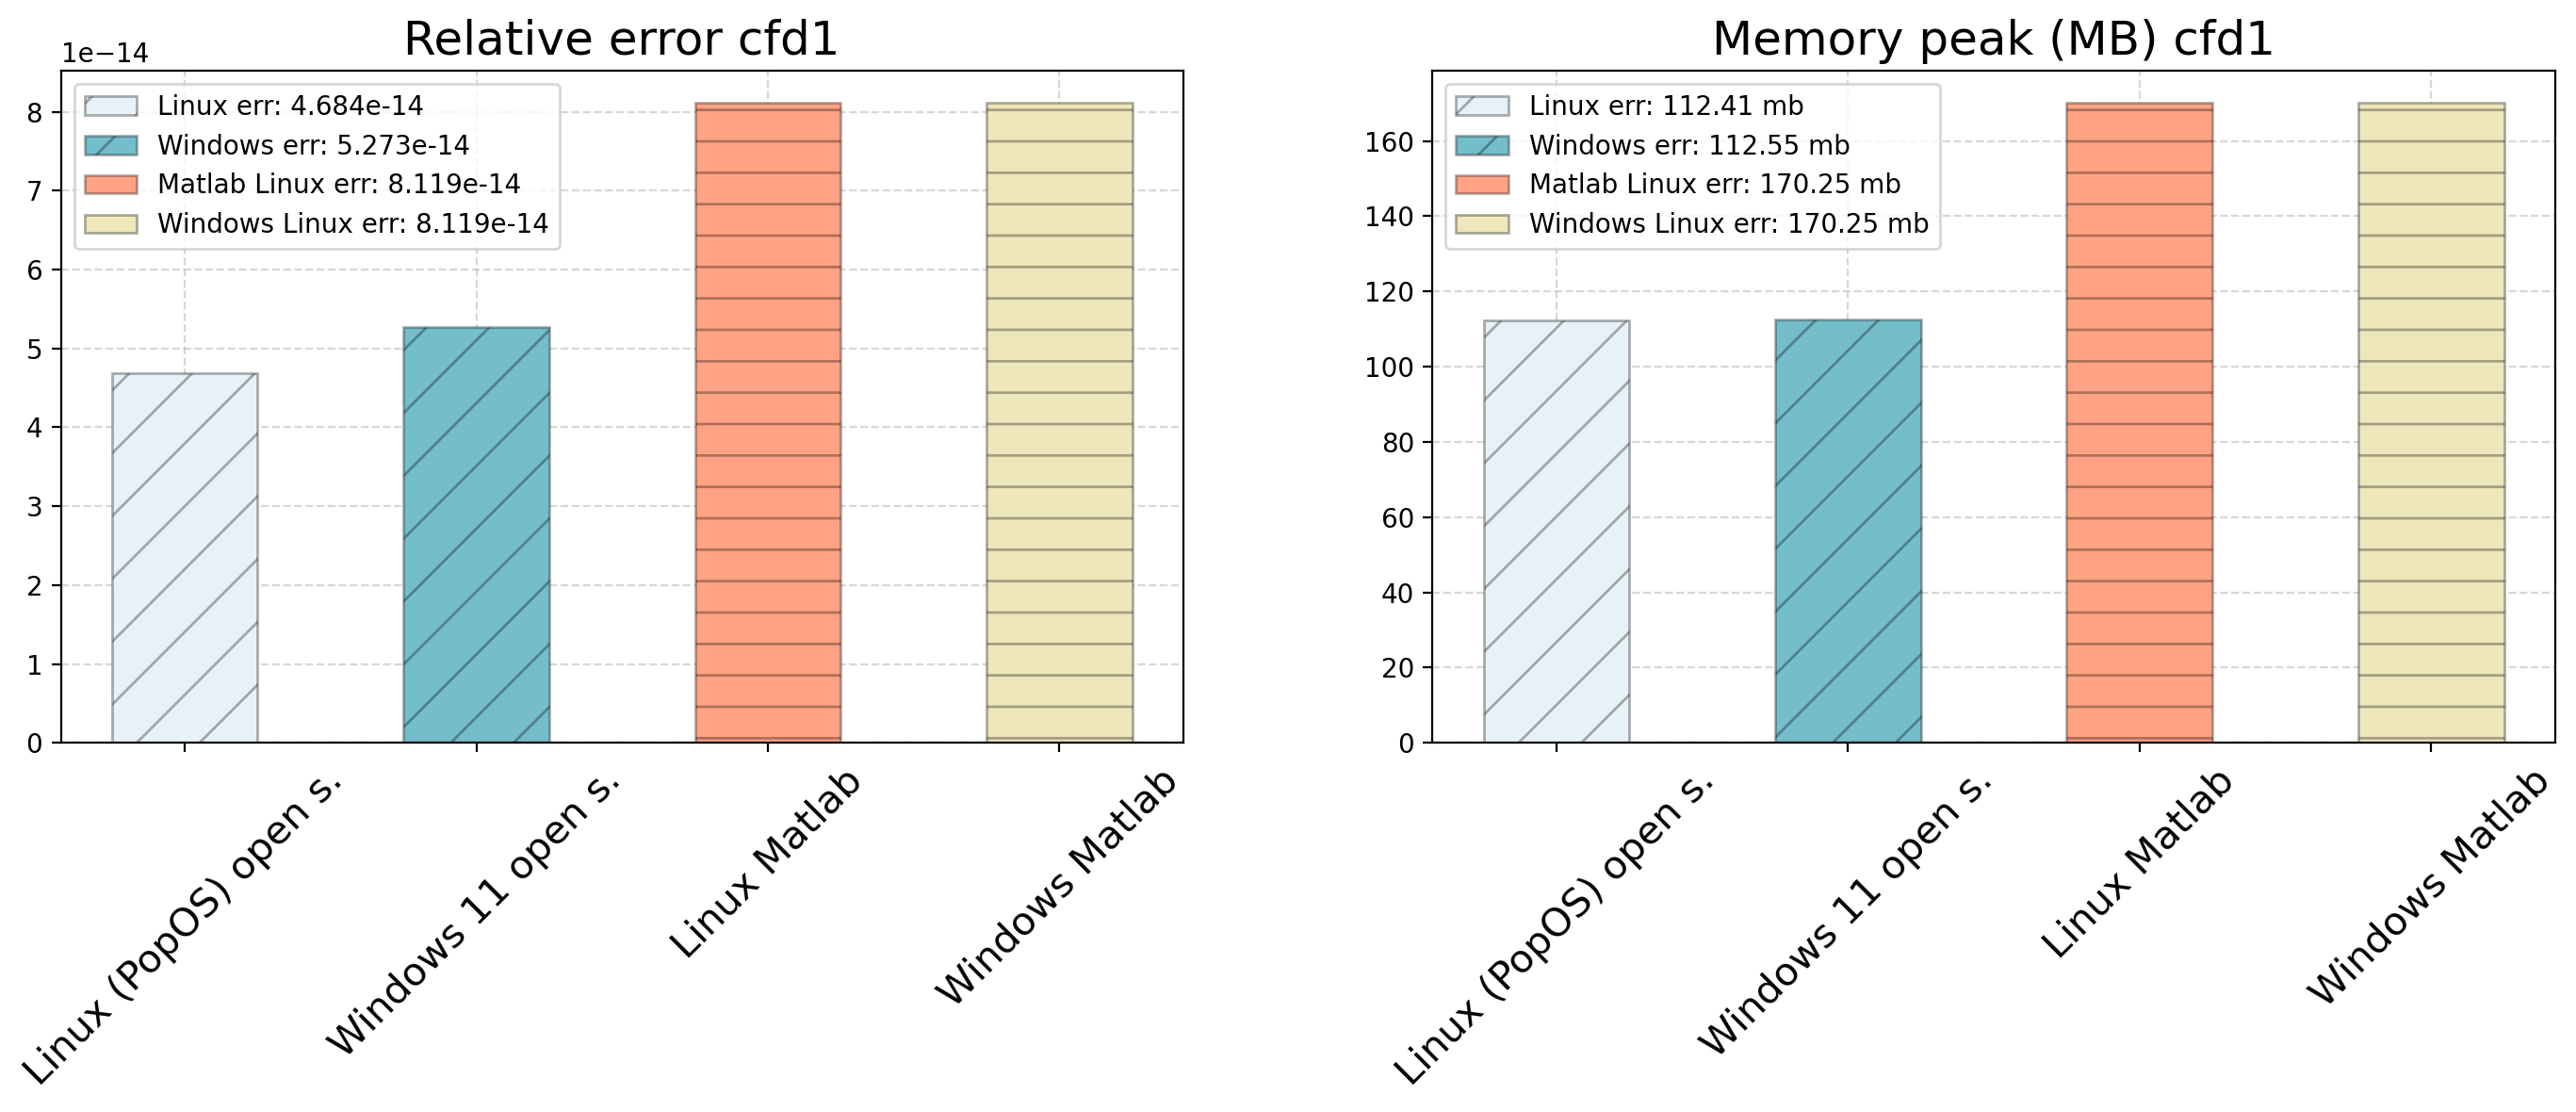

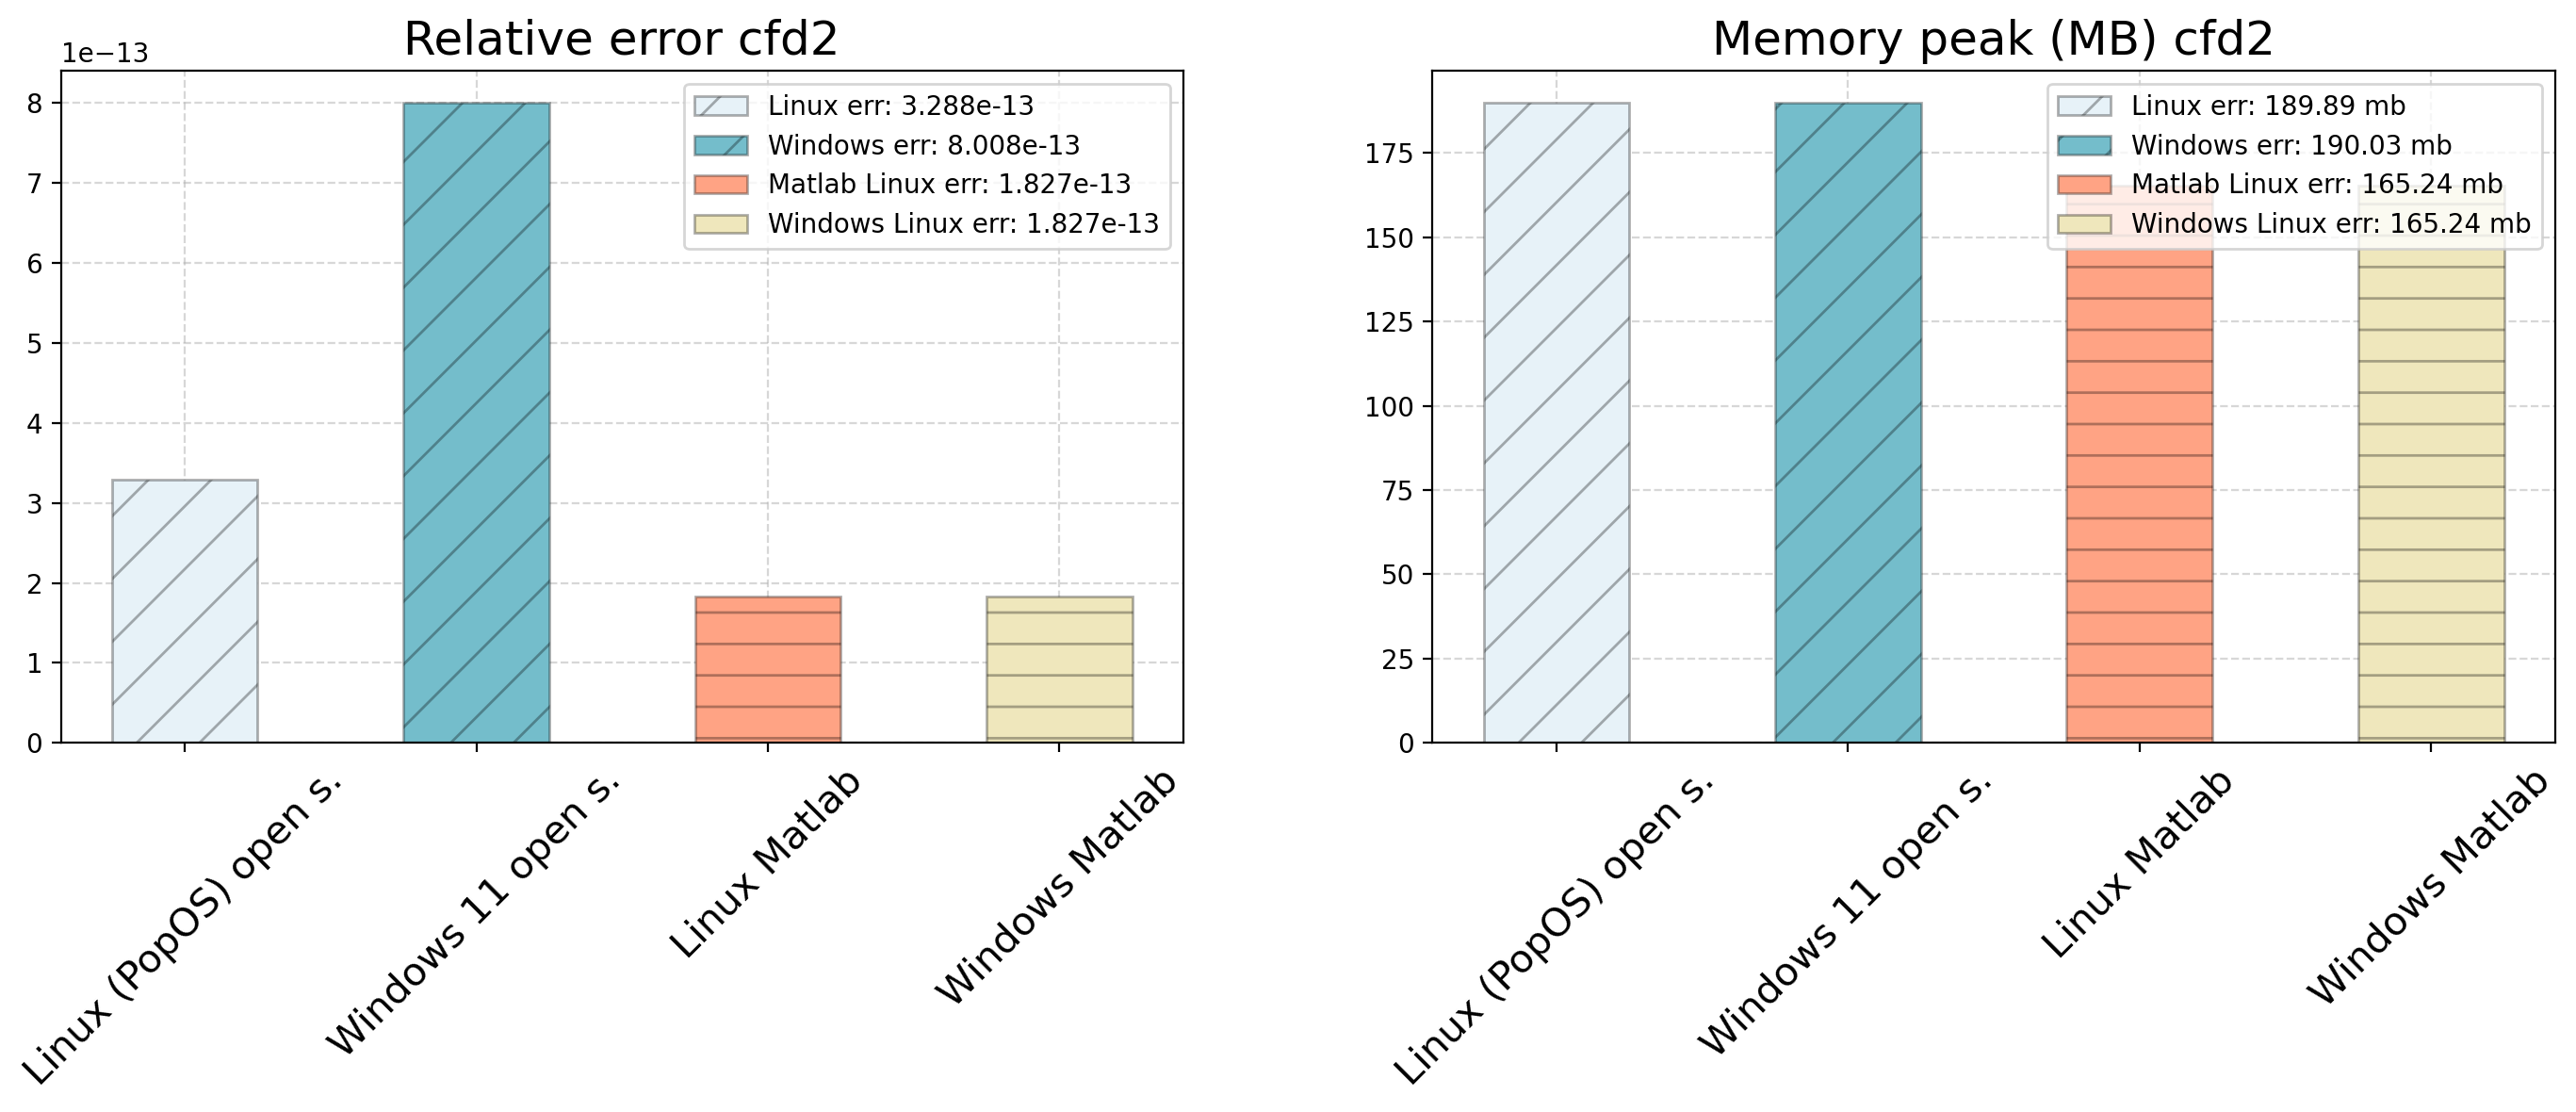

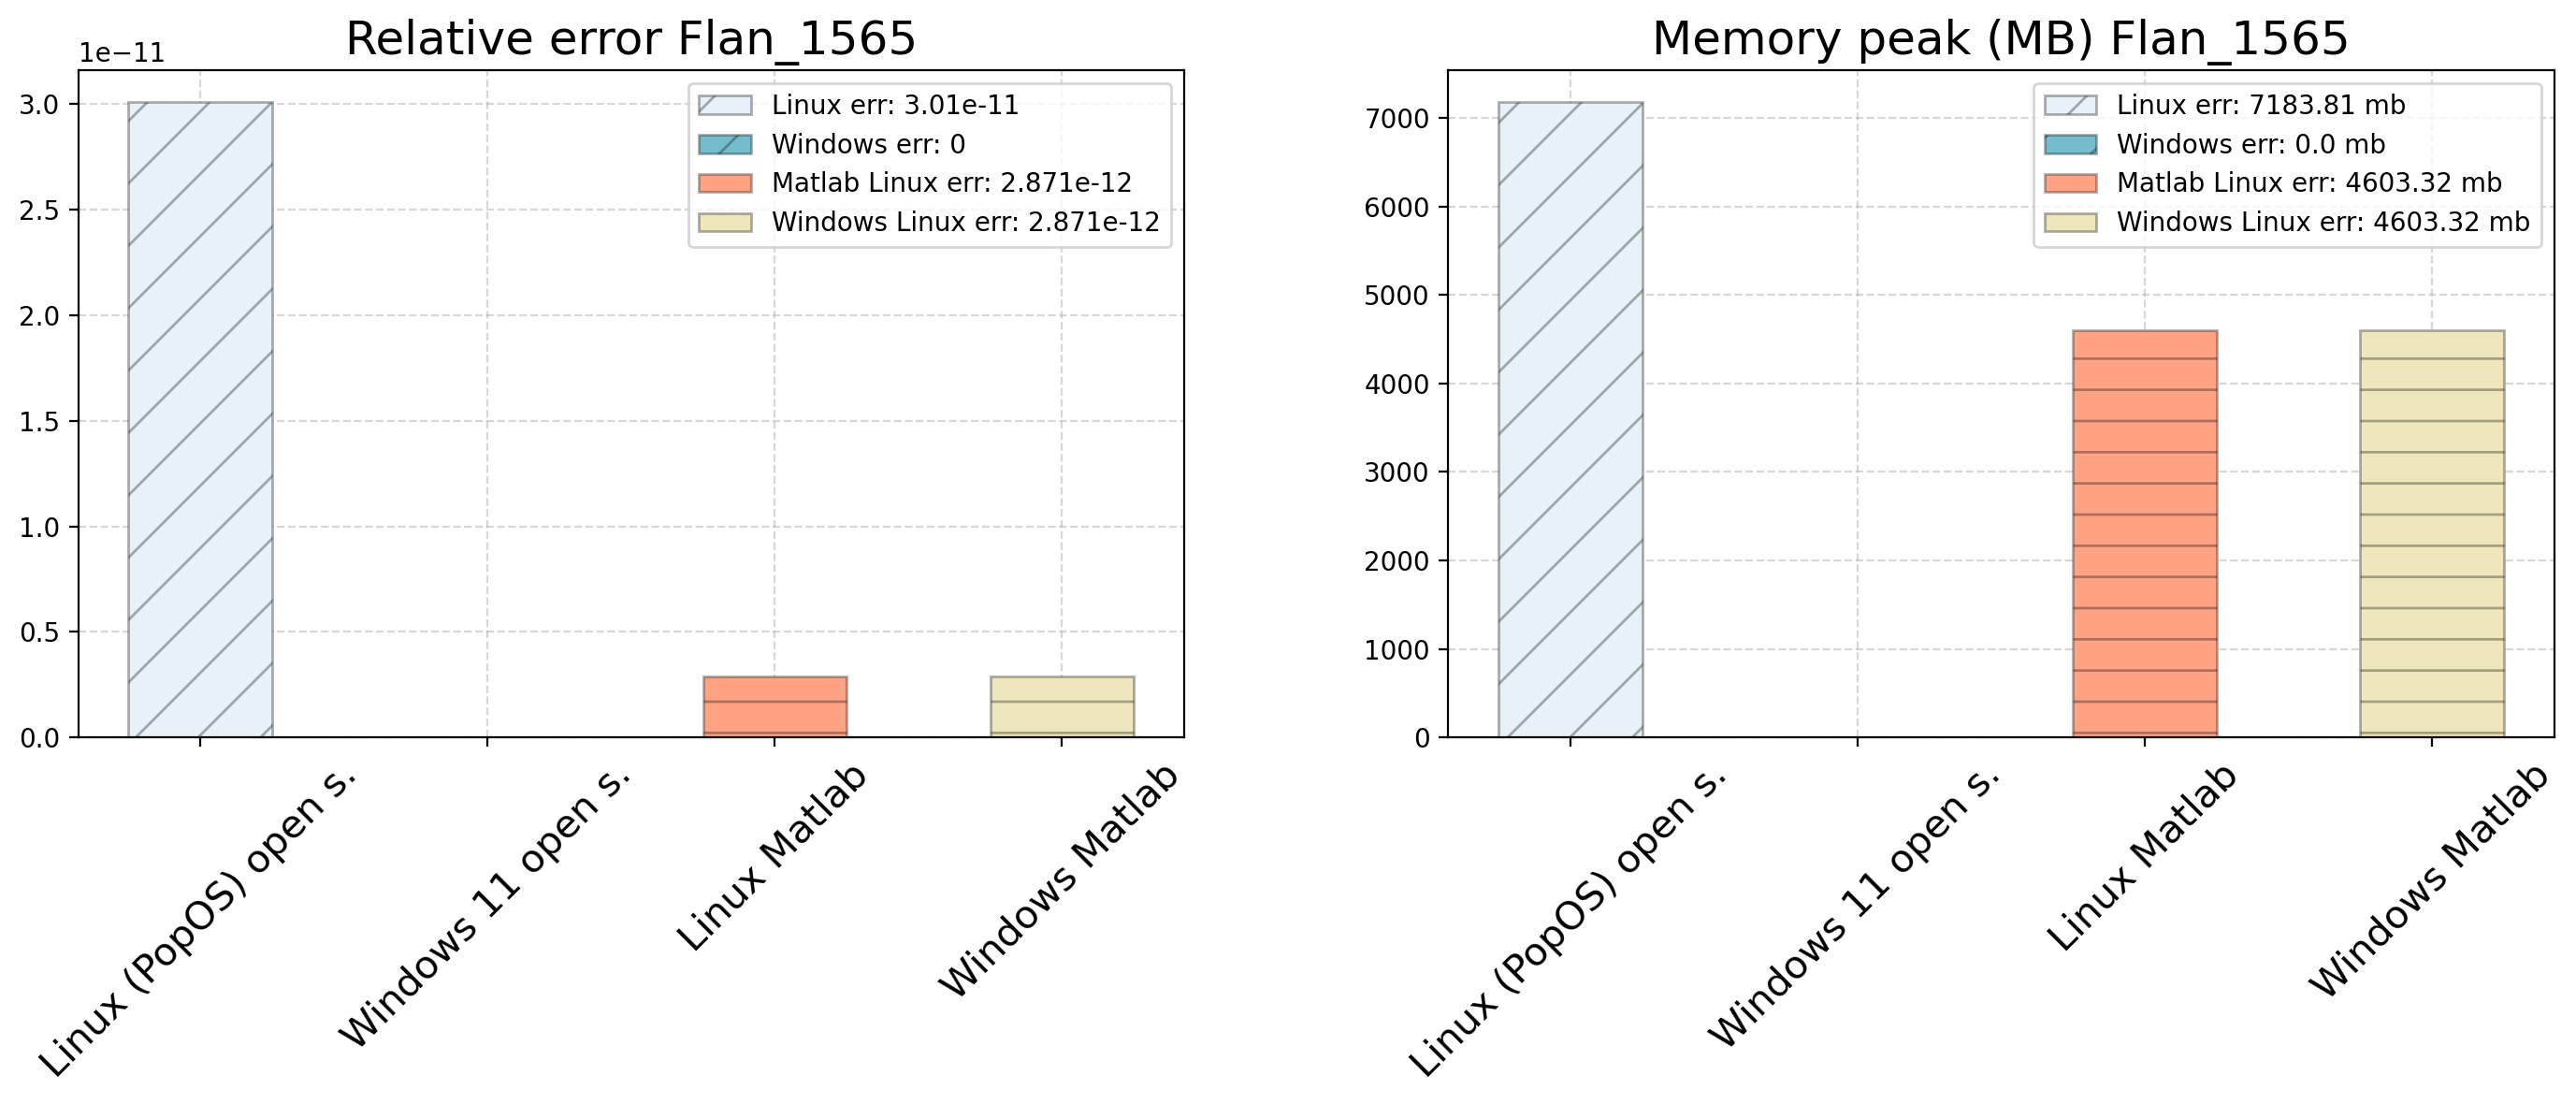

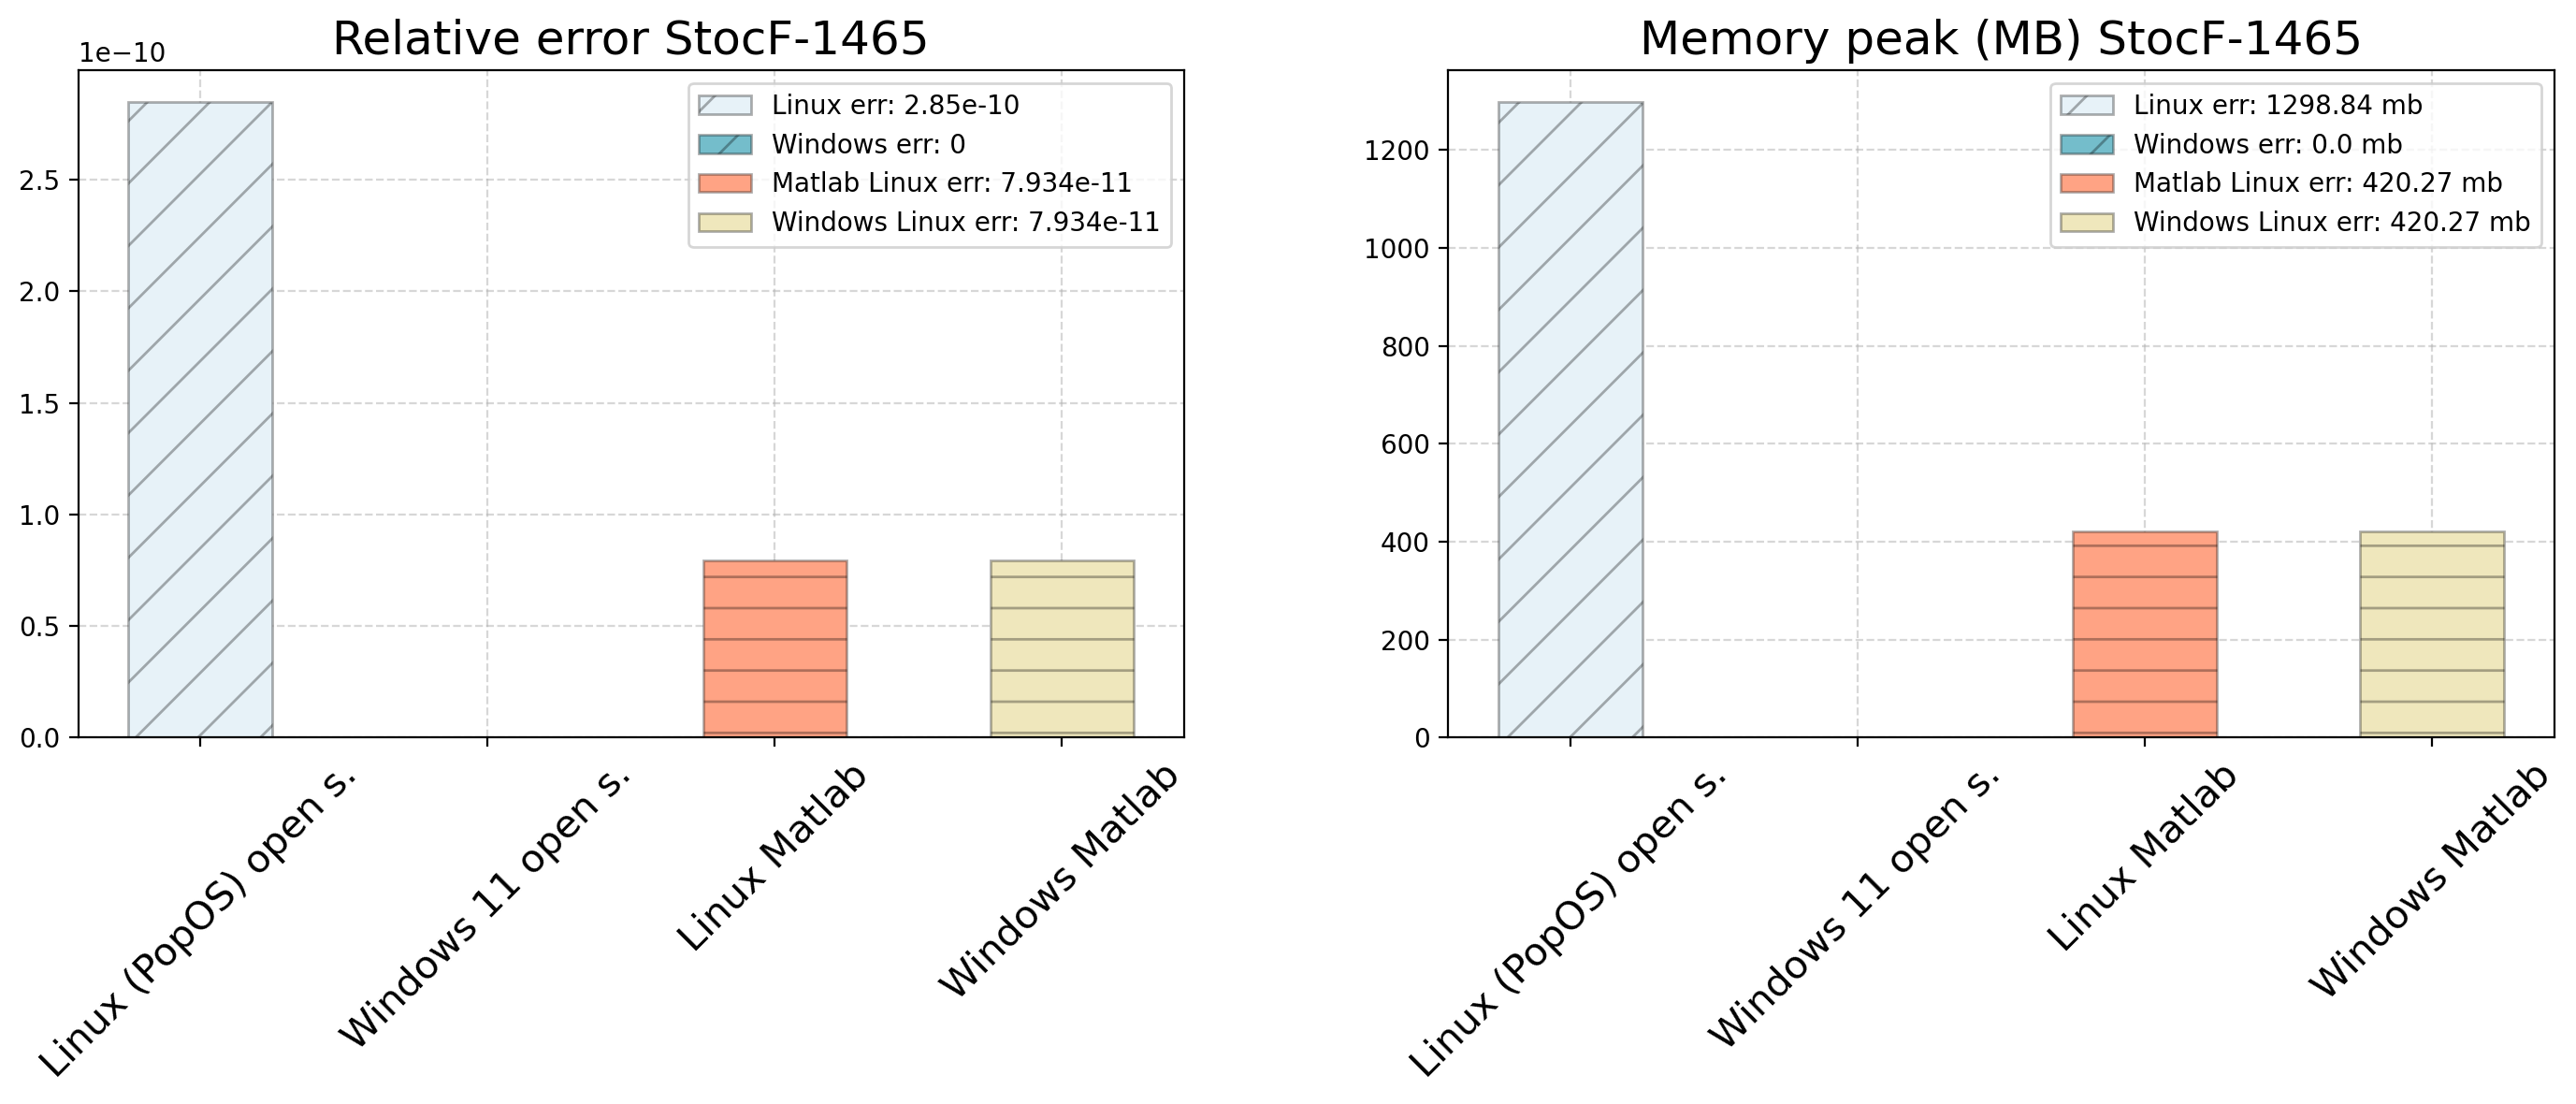

In [153]:
for matrixL, matrixW, matrixML, matrixMW in zip(benchmarks['Linux_4_luglio_2'], benchmarks['Windows_4_luglio'], benchmarks['MatlabWindows_'], benchmarks['MatlabLinux_']):
    labels = ['Linux (PopOS) open s.', 'Windows 11 open s.', 'Linux Matlab', 'Windows Matlab']
    error = [matrixL['relative_error'], matrixW['relative_error'], matrixML['relative_error'], matrixMW['relative_error']]
    memory = [matrixL['memory_peak'], matrixW['memory_peak'], matrixML['memory_peak'], matrixMW['memory_peak']]

    x = np.arange(len(labels))
    width = 0.5

    plt.figure(figsize=(14,6), dpi = 200)

    ax = plt.subplot(121)
    plt.title(f'Relative error {matrixL["matrix"].split(".")[0]}', fontsize=18)
    barlist = plt.bar(x, error, width, hatch = ['/', '/', '-', '-'], color = ['#E7F2F8', '#74BDCB', '#FFA384', '#EFE7BC'], edgecolor='#00000050')
    barlist[0].set_label(f'Linux err: {format(error[0], ".4g")}')
    barlist[1].set_label(f'Windows err: {format(error[1], ".4g")}')
    barlist[2].set_label(f'Matlab Linux err: {format(error[2], ".4g")}')
    barlist[3].set_label(f'Windows Linux err: {format(error[3], ".4g")}')
    plt.xticks([0, 1, 2, 3], labels, fontsize=15, rotation = 45)
    plt.grid(linestyle='--', alpha = 0.5)
    ax.set_axisbelow(True)
    plt.legend()

    ax = plt.subplot(122)
    plt.title(f'Memory peak (MB) {matrixL["matrix"].split(".")[0]}', fontsize=18)
    barlist2 = plt.bar(x, memory, width, hatch = ['/', '/', '-', '-'], color = ['#E7F2F8', '#74BDCB', '#FFA384', '#EFE7BC'], edgecolor='#00000050')
    barlist2[0].set_label(f'Linux err: {round(memory[0], 2)} mb')
    barlist2[1].set_label(f'Windows err: {round(memory[1], 2)} mb')
    barlist2[2].set_label(f'Matlab Linux err: {round(memory[2], 2)} mb')
    barlist2[3].set_label(f'Windows Linux err: {round(memory[3], 2)} mb')
    plt.xticks([0, 1, 2, 3], labels, fontsize=15, rotation = 45)
    plt.grid(linestyle='--', alpha = 0.5)
    ax.set_axisbelow(True)
    plt.legend()

    #plt.figlegend(loc='upper right', ncol=1, labelspacing=0.5, fontsize=14, bbox_to_anchor=(1.11, 0.9))
    plt.tight_layout(w_pad=6)
    
    plt.savefig(f'images/{matrixL["matrix"].split(".")[0]}_bars.png')
    plt.show()
    

### Boxplot riassuntivi